In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
import matplotlib
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
adv = pd.read_csv('adverts.csv')

In [3]:
adv.info

<bound method DataFrame.info of         public_reference   mileage reg_code standard_colour standard_make  \
0        202006039777689       0.0      NaN            Grey         Volvo   
1        202007020778260  108230.0       61            Blue        Jaguar   
2        202007020778474    7800.0       17            Grey         SKODA   
3        202007080986776   45000.0       16           Brown      Vauxhall   
4        202007161321269   64000.0       64            Grey    Land Rover   
...                  ...       ...      ...             ...           ...   
402000   202010315652942    5179.0       69            Grey       Peugeot   
402001   202010315657341  110000.0       59             Red       Peugeot   
402002   202010315659271   52760.0       62           White        Nissan   
402003   202011015662436   10250.0       65             Red        Abarth   
402004   201512149444029   14000.0       14          Silver          Audi   

           standard_model vehicle_condition

In [4]:
adv.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [5]:
adv.dtypes

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

In [6]:
adv.shape

(402005, 12)

In [7]:
len(adv)

402005

In [8]:
 adv[['mileage', 'price']].describe().loc[['min', '25%', '50%', '75%', 'max', 'mean']] 

,mileage,price
min,0.000000,1.200000e+02
25%,10481.000000,7.495000e+03
50%,28629.500000,1.260000e+04
75%,56875.750000,2.000000e+04
max,999999.000000,9.999999e+06
mean,37743.595656,1.734197e+04


In [9]:
# Counting NaN values in all columns
nan_count = adv.isnull().sum()

print(nan_count)

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64


In [10]:
missing_values_percentage = (adv.isnull().sum() / len(adv)) * 100
print(missing_values_percentage)

public_reference         0.000000
mileage                  0.031592
reg_code                 7.924528
standard_colour          1.337794
standard_make            0.000000
standard_model           0.000000
vehicle_condition        0.000000
year_of_registration     8.286215
price                    0.000000
body_type                0.208206
crossover_car_and_van    0.000000
fuel_type                0.149501
dtype: float64


In [11]:
#checking if public reference has any duplicates
boolean = adv['public_reference'].duplicated().any()
print(boolean)

False


In [12]:
adv = adv.set_index('public_reference')

In [13]:
adv.columns

Index(['mileage', 'reg_code', 'standard_colour', 'standard_make',
       'standard_model', 'vehicle_condition', 'year_of_registration', 'price',
       'body_type', 'crossover_car_and_van', 'fuel_type'],
      dtype='object')

In [14]:
adv.sample(5) 

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,,
202010084738505,10.0,70,Red,Mazda,Mazda3,USED,2020.0,21790,Hatchback,False,Petrol
202010114868449,4000.0,69,Silver,Kia,Picanto,USED,2019.0,11495,Hatchback,False,Petrol
202010124914197,33999.0,14,White,BMW,4 Series,USED,2014.0,17991,Convertible,False,Petrol
202009103542744,3066.0,69,Grey,Volvo,XC40,USED,2020.0,29690,SUV,False,Petrol
202010054613873,3560.0,67,Silver,Audi,A4,USED,2017.0,15799,Saloon,False,Petrol


In [15]:
(adv.loc[ adv['reg_code']== 'B' ])


,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,,
202008042070611,49585.0,B,NaN,Ferrari,308,USED,1984.0,54475,Convertible,False,Petrol
201809210743226,3900.0,B,Red,Toyota,Celica,USED,1984.0,23450,Coupe,False,Petrol
202003098187902,73330.0,B,Gold,Jaguar,Mark II,USED,NaN,24990,Saloon,False,Petrol
202009153772843,24000.0,B,Silver,MG,Metro,USED,1984.0,8995,Hatchback,False,Petrol
202010275489288,56109.0,B,Red,Jaguar,E-Type,USED,1964.0,119995,Coupe,False,Petrol
202008272998841,76000.0,B,Black,Rolls-Royce,Silver Spirit,USED,1985.0,8495,Saloon,False,Petrol
202010195173890,123000.0,B,Red,Citroen,2 CV,USED,1984.0,3999,Saloon,False,Petrol
202006170216087,91700.0,B,Red,Porsche,911,USED,1985.0,42995,Coupe,False,Petrol
202010044577681,53600.0,B,Red,Renault,5,USED,1985.0,4800,Hatchback,False,Petrol


In [16]:
adv.loc[[202008242869411]]

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,,
202008242869411,3000.0,20,Red,Volvo,XC40,USED,2020.0,29895,SUV,False,Petrol


In [17]:
adv.loc[[202009234085081]]

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,,
202009234085081,18107.0,19,Silver,Volkswagen,Golf,USED,2019.0,16000,Hatchback,False,Petrol


In [18]:
adv.loc[[202010104826185]]

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,,
202010104826185,5972.0,69,White,Vauxhall,Corsa,USED,2019.0,10000,Hatchback,False,Petrol


In [19]:
adv.loc[[202002067009819]]

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,,
202002067009819,0.0,NaN,Black,Fiat,500X,NEW,NaN,22300,SUV,False,Petrol


In [20]:
adv.columns

Index(['mileage', 'reg_code', 'standard_colour', 'standard_make',
       'standard_model', 'vehicle_condition', 'year_of_registration', 'price',
       'body_type', 'crossover_car_and_van', 'fuel_type'],
      dtype='object')

In [21]:
adv = adv.set_axis([
    'Mileage', 'Regcode', 'Colour', 'Make', 'Model',
       'Vehicle condition', 'Year of Registration', 'Price', 'Bodytype',
       'Crossover car and van', 'Fueltype'
], axis='columns')
#year_of_registration'

In [22]:
unique_years = sorted(adv['Year of Registration'].unique())
print(unique_years)

[nan, 999.0, 1006.0, 1007.0, 1008.0, 1009.0, 1010.0, 1015.0, 1016.0, 1017.0, 1018.0, 1063.0, 1515.0, 1909.0, 1933.0, 1934.0, 1950.0, 1952.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0]


In [23]:
adv['Year of Registration'].value_counts().tail(50)

Year of Registration
1986.0    37
1985.0    29
1973.0    29
1972.0    25
1980.0    24
1970.0    24
1971.0    22
1979.0    22
1982.0    21
1984.0    19
1969.0    19
1968.0    17
1983.0    16
1978.0    15
1965.0    14
1964.0    14
1976.0    12
1977.0    12
1981.0    12
1962.0    10
1974.0     9
1967.0     9
1966.0     8
1963.0     7
1961.0     7
1975.0     6
1960.0     5
1957.0     5
1954.0     4
1007.0     3
1955.0     3
1956.0     3
1959.0     3
1958.0     3
999.0      3
1009.0     2
1952.0     2
1933.0     2
1515.0     1
1008.0     1
1006.0     1
1017.0     1
1018.0     1
1909.0     1
1950.0     1
1010.0     1
1934.0     1
1016.0     1
1063.0     1
1015.0     1
Name: count, dtype: int64

In [24]:
adv[adv[['Regcode','Year of Registration']].isna().all(1)]

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype
public_reference,,,,,,,,,,,
202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
201911043995897,5.0,NaN,NaN,Nissan,X-Trail,NEW,NaN,27595,SUV,False,Diesel
202008272998331,0.0,NaN,White,Volkswagen,T-Cross,NEW,NaN,25000,SUV,False,Petrol
202001306737473,0.0,NaN,White,Fiat,Panda,NEW,NaN,13999,Hatchback,False,Petrol
202003178531910,0.0,NaN,NaN,Honda,Civic,NEW,NaN,19495,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...
202010024501227,10.0,NaN,Silver,Mitsubishi,Shogun Sport,NEW,NaN,31999,SUV,False,Diesel
202010104843364,5.0,NaN,Red,BMW,Z4,NEW,NaN,47910,Convertible,False,Petrol
202010134960554,10.0,NaN,White,BMW,3 Series,NEW,NaN,35023,Saloon,False,Petrol


In [25]:
adv['Year of Registration'] = adv.groupby('Model')['Year of Registration'].ffill().bfill()

In [26]:
nan_count = adv.isnull().sum()

print(nan_count)

Mileage                    127
Regcode                  31857
Colour                    5378
Make                         0
Model                        0
Vehicle condition            0
Year of Registration         0
Price                        0
Bodytype                   837
Crossover car and van        0
Fueltype                   601
dtype: int64


In [27]:
aq = len(adv['Vehicle condition'])
print(aq)

402005


In [28]:
adv['Vehicle condition'].unique()

array(['NEW', 'USED'], dtype=object)

In [29]:
adv['Vehicle condition'].value_counts()

Vehicle condition
USED    370756
NEW      31249
Name: count, dtype: int64

In [30]:
(adv['Vehicle condition'].value_counts() / aq) *100

Vehicle condition
USED    92.226714
NEW      7.773286
Name: count, dtype: float64

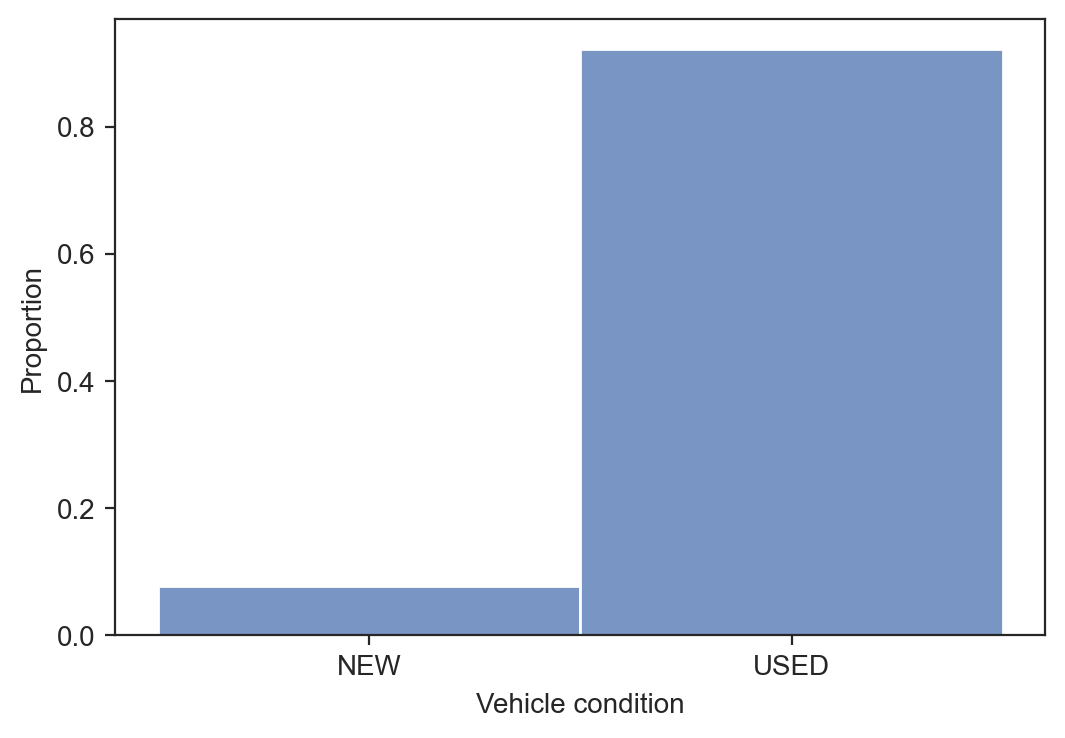

In [31]:
sns.histplot(adv['Vehicle condition'], stat='proportion');
plt.savefig("a.jpeg")

In [32]:
adv.head()

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype
public_reference,,,,,,,,,,,
202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,2011.0,73970,SUV,False,Petrol Plug-in Hybrid
202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [33]:
adv.dtypes

Mileage                  float64
Regcode                   object
Colour                    object
Make                      object
Model                     object
Vehicle condition         object
Year of Registration     float64
Price                      int64
Bodytype                  object
Crossover car and van       bool
Fueltype                  object
dtype: object

In [34]:
adv = (adv.loc[ adv['Year of Registration']>=1900 ])

In [35]:
adv['Year of Registration'].value_counts().tail(40) # set the treshold from 1986

Year of Registration
1988.0    71
1987.0    50
1986.0    38
1985.0    31
1973.0    29
1970.0    27
1972.0    26
1980.0    24
1979.0    23
1971.0    23
1982.0    21
1969.0    20
1984.0    19
1964.0    18
1978.0    17
1968.0    17
1983.0    16
1976.0    14
1965.0    14
1977.0    13
1981.0    12
1967.0    12
1962.0    10
1966.0     9
1974.0     9
1963.0     8
1961.0     7
1975.0     6
1957.0     5
1954.0     5
1960.0     5
1955.0     4
1959.0     3
1958.0     3
1933.0     3
1956.0     3
1952.0     2
1909.0     1
1934.0     1
1950.0     1
Name: count, dtype: int64

In [36]:
adv = adv[(adv['Year of Registration'] >= 1986)]

In [37]:
adv.loc[[202008242869411]]

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype
public_reference,,,,,,,,,,,
202008242869411,3000.0,20,Red,Volvo,XC40,USED,2020.0,29895,SUV,False,Petrol


In [38]:
adv.loc[[202009234085081]]

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype
public_reference,,,,,,,,,,,
202009234085081,18107.0,19,Silver,Volkswagen,Golf,USED,2019.0,16000,Hatchback,False,Petrol


In [39]:
adv.loc[[202010104826185]]

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype
public_reference,,,,,,,,,,,
202010104826185,5972.0,69,White,Vauxhall,Corsa,USED,2019.0,10000,Hatchback,False,Petrol


In [40]:
#adv.loc[[202002067009819]]

In [41]:
adv['Fueltype'].unique()

array(['Petrol Plug-in Hybrid', 'Diesel', 'Petrol', 'Diesel Hybrid',
       'Petrol Hybrid', 'Electric', 'Diesel Plug-in Hybrid', nan,
       'Bi Fuel', 'Natural Gas'], dtype=object)

In [42]:
adv['Fueltype'].value_counts()

Fueltype
Petrol                   216492
Diesel                   158104
Petrol Hybrid             13601
Petrol Plug-in Hybrid      6159
Electric                   4783
Diesel Hybrid              1403
Bi Fuel                     221
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: count, dtype: int64

In [43]:
adv.loc[ adv['Fueltype']=='Natural Gas']

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype
public_reference,,,,,,,,,,,
202010315647990,160000.0,55,White,Iveco,Daily,USED,2005.0,3795,Combi Van,True,Natural Gas


In [44]:
adv['Bodytype'].unique() 

array(['SUV', 'Saloon', 'Hatchback', 'Convertible', 'Limousine', 'Estate',
       'MPV', 'Coupe', nan, 'Pickup', 'Combi Van', 'Panel Van', 'Minibus',
       'Window Van', 'Camper', 'Car Derived Van', 'Chassis Cab'],
      dtype=object)

In [45]:
adv['Bodytype'].value_counts()

Bodytype
Hatchback          167280
SUV                115851
Saloon              36538
Estate              24682
Coupe               23148
MPV                 16026
Convertible         15897
Pickup                610
Combi Van             214
Limousine             157
Minibus               149
Camper                 67
Panel Van              59
Window Van             41
Chassis Cab             3
Car Derived Van         2
Name: count, dtype: int64

In [46]:
(adv.loc[ adv['Bodytype']=='Combi Van' ]).head(50)

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype
public_reference,,,,,,,,,,,
202011015668810,151000.0,59,Black,Volkswagen,Transporter Sportline,USED,2009.0,13000,Combi Van,True,Diesel
202010205209275,149000.0,05,White,Volkswagen,Transporter,USED,2005.0,8200,Combi Van,True,Diesel
202010145004133,96000.0,64,Grey,Volkswagen,Transporter,USED,2014.0,18750,Combi Van,True,Diesel
202008142497419,2658.0,69,White,Peugeot,Boxer,USED,2020.0,20058,Combi Van,False,Diesel
202002107163702,56000.0,62,Gold,Peugeot,Expert Tepee,USED,2012.0,6500,Combi Van,True,Diesel
202008293075951,31700.0,66,Grey,Fiat,Talento,USED,2016.0,13995,Combi Van,True,Diesel
202010215268466,65000.0,15,Grey,Vauxhall,Vivaro,USED,2015.0,23500,Combi Van,True,Diesel
201910163376428,12.0,NaN,Black,Nissan,e-NV200,NEW,2009.0,32990,Combi Van,True,Electric
202010185136529,102000.0,09,Black,Volkswagen,Transporter Sportline,USED,2009.0,13295,Combi Van,True,Diesel


In [47]:
adv.loc[ adv['Bodytype']=='Car Derived Van']

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype
public_reference,,,,,,,,,,,
202010175103802,193000.0,13,White,MINI,Clubvan,USED,2013.0,3995,Car Derived Van,True,Diesel
202006290651056,103000.0,NaN,White,Toyota,Granvia,USED,2012.0,10495,Car Derived Van,False,Diesel


In [48]:
adv['Colour'].value_counts()

Colour
Black          86255
White          70482
Grey           68208
Blue           59713
Silver         49291
Red            41929
Green           4470
Orange          4082
Yellow          2087
Brown           2003
Multicolour     1848
Beige           1531
Bronze          1327
Purple          1210
Gold             811
Pink             409
Turquoise        306
Maroon           158
Burgundy          63
Magenta           15
Navy               7
Indigo             1
Name: count, dtype: int64

In [49]:
domain_red = ['Red', 'Burgundy', 'Maroon']
domain_blue = ['Blue', 'Navy', 'Indigo', 'Turquoise']
domain_yellow = ['Yellow', 'Beige']
domain_purple = ['Purple', 'Magenta']

red_map = dict.fromkeys(domain_red, 'Red')
blue_map = dict.fromkeys(domain_blue, 'Blue')
yellow_map = dict.fromkeys(domain_yellow, 'Yellow')
purple_map = dict.fromkeys(domain_purple, 'Purple')
colour_scheme_map = {
    **red_map,
    **blue_map,
    **yellow_map,
    **purple_map,
    'Grey': 'Grey',
    #'Blue': 'Blue',
'Brown':'Brown',
#'Red':'Red',
'Bronze':'Bronze',
'Black':'Black',
'White':'White',
'Silver':'Silver',
#'Purple':'Purple',
'Green':'Green',
'Orange':'Orange',
#'Yellow':'Yellow',
'Gold':'Gold',
'Multicolour':'Multicolour',
'Pink':'Pink'
    

}
adv['Colour'] = adv['Colour'].map(colour_scheme_map)

In [50]:
adv['Colour'].value_counts().tail(50)

Colour
Black          86255
White          70482
Grey           68208
Blue           60027
Silver         49291
Red            42150
Green           4470
Orange          4082
Yellow          3618
Brown           2003
Multicolour     1848
Bronze          1327
Purple          1225
Gold             811
Pink             409
Name: count, dtype: int64

In [51]:
adv['Make'].value_counts().tail(50)

Make
Proton            25
Daimler           21
Caterham          20
Cadillac          15
Daewoo            10
Perodua           10
Austin             9
LEVC               9
Hummer             9
Bugatti            8
Lincoln            7
Replica            7
Great Wall         6
Westfield          6
Iveco              5
GMC                5
Holden             4
Maybach            4
Corvette           4
Ariel              3
Tiger              3
Opel               3
AC                 3
Lancia             2
Aixam              2
Noble              2
Zenos              2
Triumph            2
BAC                2
Dax                2
Pilgrim            2
Bristol            1
Mitsuoka           1
Jensen             1
Pontiac            1
Radical            1
Sebring            1
Buick              1
Carbodies          1
AK                 1
Datsun             1
Mev                1
Ultima             1
Beauford           1
Morris             1
Plymouth           1
Panther            1
Reliant 

In [52]:
adv['Model'].value_counts().tail(50)

Model
Alpina B6             1
Shamal                1
Se                    1
Paseo                 1
Isis                  1
Mark II Blitz         1
Pickup                1
19                    1
Space Wagon           1
CAN-AM                1
Maxima QX             1
Era HSS               1
XPower                1
Porte                 1
Abarth                1
Crown                 1
F512                  1
Z1                    1
Combo Tour            1
Alpina D4 Bi-Turbo    1
MX-30                 1
Alpina B4             1
Ulysse                1
Exocet                1
2000                  1
GTA                   1
SZ                    1
Chiron                1
GS F                  1
Durango               1
Stagea                1
Sovereign             1
Starlet Glanza V      1
Black Cab             1
Scuderia Spider       1
Europa                1
Croma                 1
Xantia                1
222                   1
MX-3                  1
917                   1
DB5       

In [53]:
(adv.loc[ adv['Model']== 'Discovery' ])

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype
public_reference,,,,,,,,,,,
202010054616217,42333.0,17,Silver,Land Rover,Discovery,USED,2017.0,38990,SUV,False,Diesel
202010215258812,6679.0,68,Black,Land Rover,Discovery,USED,2019.0,54495,SUV,False,Diesel
202007171339614,92235.0,51,Gold,Land Rover,Discovery,USED,2001.0,5495,SUV,False,Diesel
202009284315780,61125.0,67,White,Land Rover,Discovery,USED,2017.0,36000,SUV,False,Diesel
202010134943201,10.0,NaN,Grey,Land Rover,Discovery,NEW,2017.0,69499,SUV,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...
202010225312729,30000.0,17,Black,Land Rover,Discovery,USED,2017.0,35799,SUV,False,Diesel
202009113606969,33700.0,67,White,Land Rover,Discovery,USED,2018.0,40000,SUV,False,Diesel
202004078885601,4351.0,69,White,Land Rover,Discovery,USED,2020.0,44490,SUV,False,Diesel


In [54]:
adv['Milesperyear'] = adv['Mileage'] / (2020 - adv['Year of Registration']).replace(0, 1)

In [55]:
adv['Crossover car and van'] = adv['Crossover car and van'].astype(int)

In [56]:
(adv.loc[ adv['Crossover car and van']==1 ]).head(50)

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype,Milesperyear
public_reference,,,,,,,,,,,,
202006300703207,7066.0,67,Purple,Volkswagen,Caddy Life,USED,2017.0,17975,MPV,1,Petrol,2355.333333
202010275504469,2879.0,20,Black,Nissan,Navara,USED,2020.0,29990,Pickup,1,Diesel,2879.000000
202010285515479,281500.0,06,Silver,Volkswagen,Caravelle,USED,2006.0,7650,MPV,1,Diesel,20107.142857
202011015668810,151000.0,59,Black,Volkswagen,Transporter Sportline,USED,2009.0,13000,Combi Van,1,Diesel,13727.272727
202005209437331,0.0,NaN,Blue,SsangYong,Musso,NEW,2012.0,25631,Pickup,1,Diesel,0.000000
202010074714694,108000.0,06,Silver,Isuzu,Rodeo,USED,2006.0,7500,Pickup,1,Diesel,7714.285714
202008102303002,72252.0,55,Green,Isuzu,Rodeo,USED,2005.0,3750,Pickup,1,Diesel,4816.800000
202008192681009,165000.0,D,Blue,Land Rover,90,USED,1987.0,10489,SUV,1,Diesel,5000.000000
202003017882700,3238.0,69,Silver,Mercedes-Benz,V Class,USED,2019.0,44000,MPV,1,Diesel,3238.000000


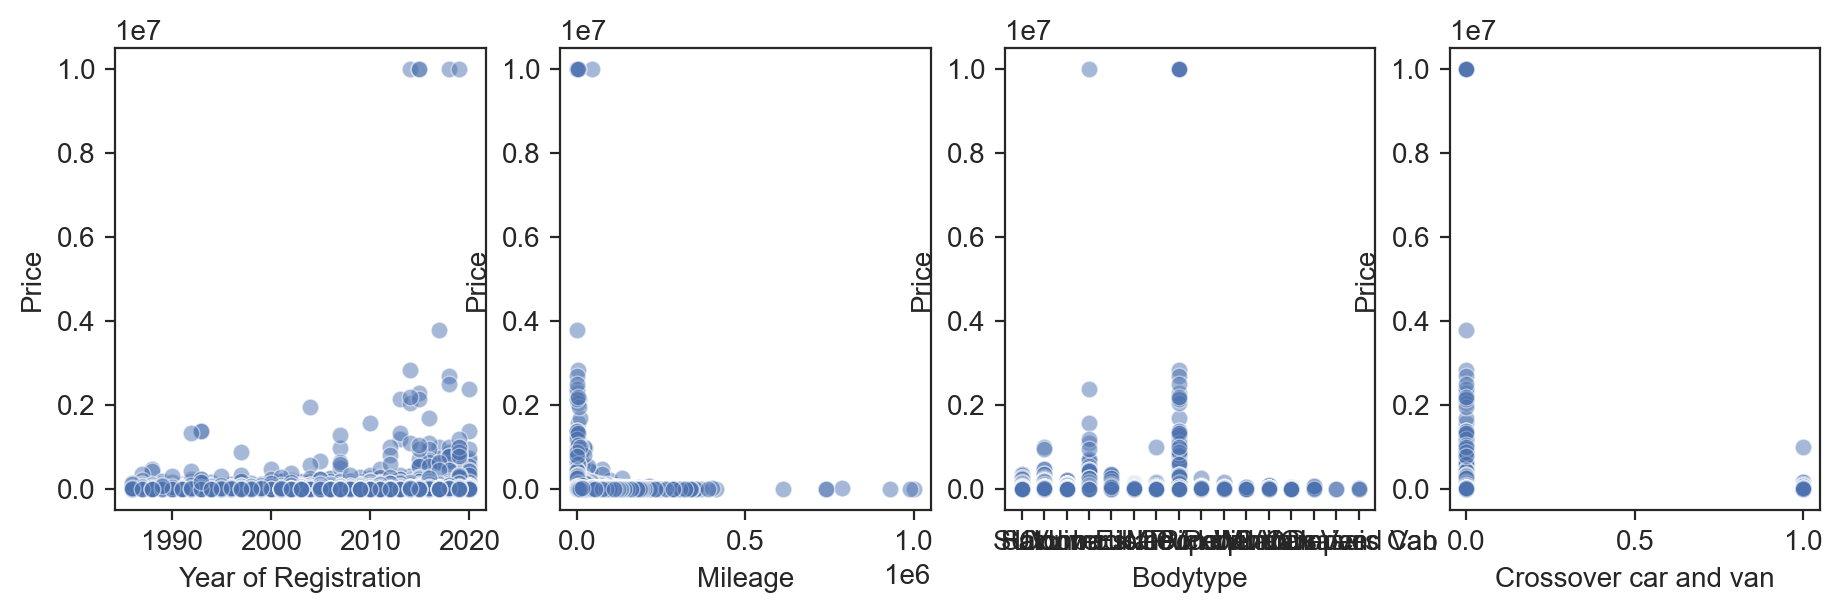

In [57]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(11,3))
sns.scatterplot(data=adv, x='Year of Registration', y='Price', alpha=0.5, ax=axs[0])
sns.scatterplot(data=adv, x='Mileage', y='Price', alpha=0.5, ax=axs[1])
sns.scatterplot(data=adv, x='Bodytype', y='Price', alpha=0.5, ax=axs[2])
sns.scatterplot(data=adv, x='Crossover car and van', y='Price', alpha=0.5, ax=axs[3]);


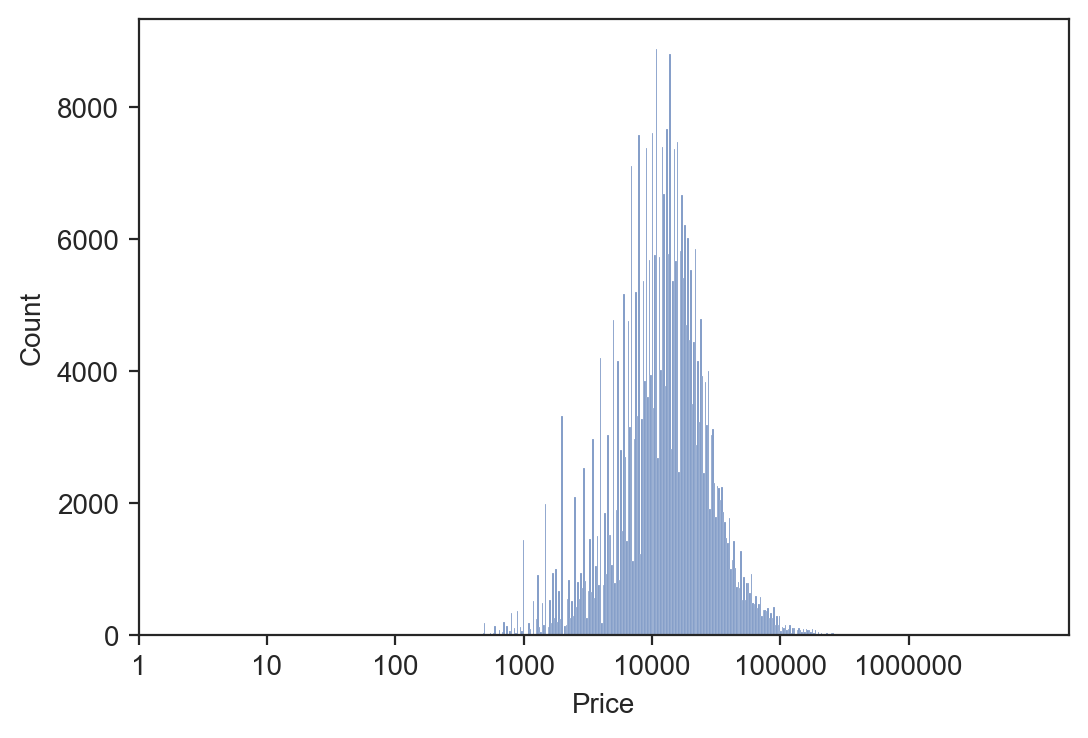

In [58]:
ax = sns.histplot(np.log10(adv.loc[ adv['Price']>0, 'Price']))
ax.set_xticks(range(0,7))
ax.set_xticklabels(np.power(10, range(0,7)));
#appearsto be somewhat normally distributed

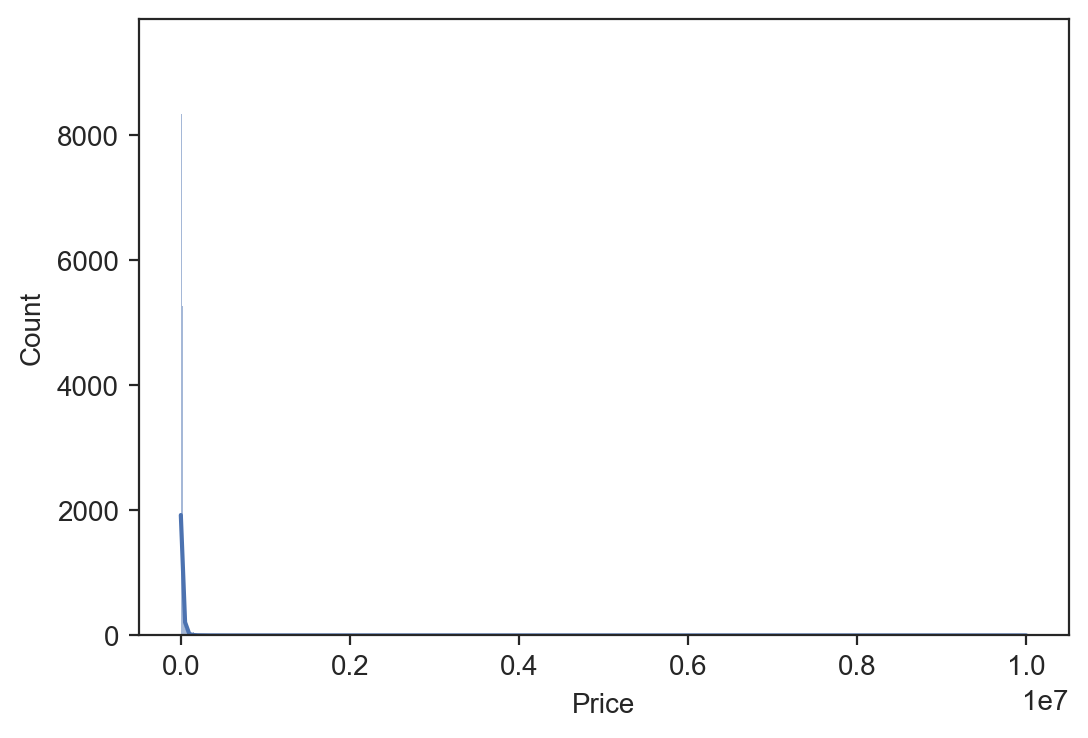

In [59]:
sns.histplot(data=adv.query("Price>100"), x='Price',
             common_norm=False, kde=True);

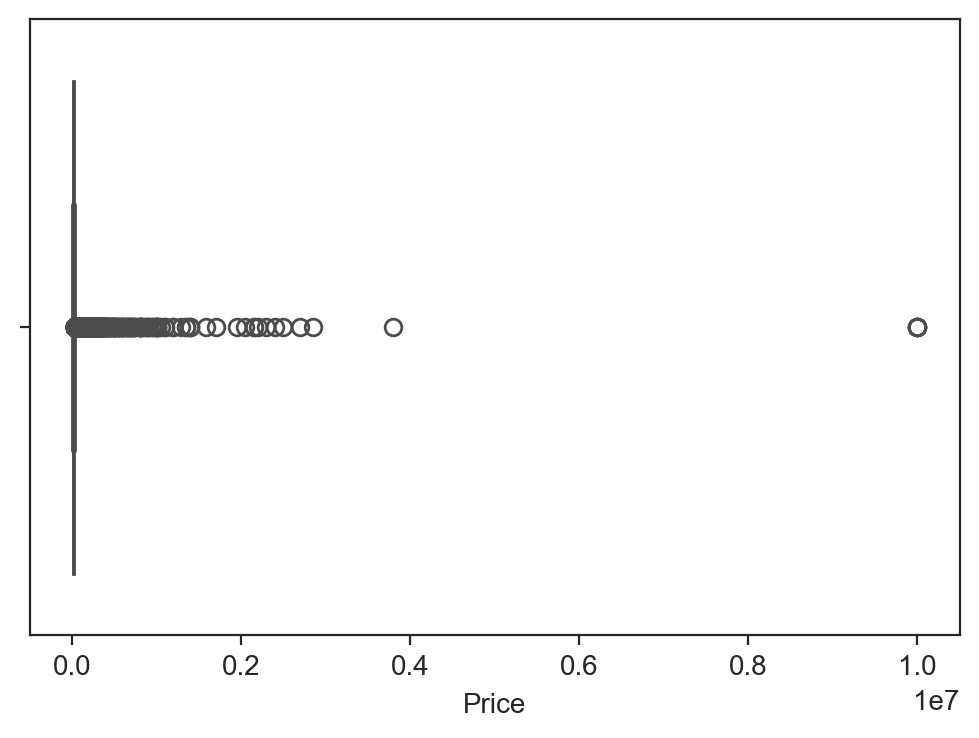

In [60]:
sns.boxplot(data=adv, x='Price');
plt.savefig('box.jpeg')

In [61]:
num_samples = 10000
bootstrap_samples = np.empty((num_samples, len(adv)))
print(bootstrap_samples.shape)

(10000, 401526)


In [62]:
rng = np.random.default_rng(seed=42)

In [63]:
for i in range(0, num_samples):
    bootstrap_samples[i] = rng.choice(adv['Price'], len(adv))


In [64]:
bootstrap_means = bootstrap_samples.mean(axis=1)
# just a quick look to see if it makes sense
bootstrap_means[:20], len(bootstrap_means)

(array([17386.15447568, 17259.26134547, 17320.43278144, 17257.63880297,
        17219.6210756 , 17341.94628243, 17319.56798314, 17284.21820754,
        17298.91530561, 17244.16871386, 17253.80089957, 17283.73919497,
        17244.57569871, 17253.69997709, 17202.03243377, 17336.59885039,
        17279.19649537, 17333.25314425, 17432.70565542, 17327.51310251]),
 10000)

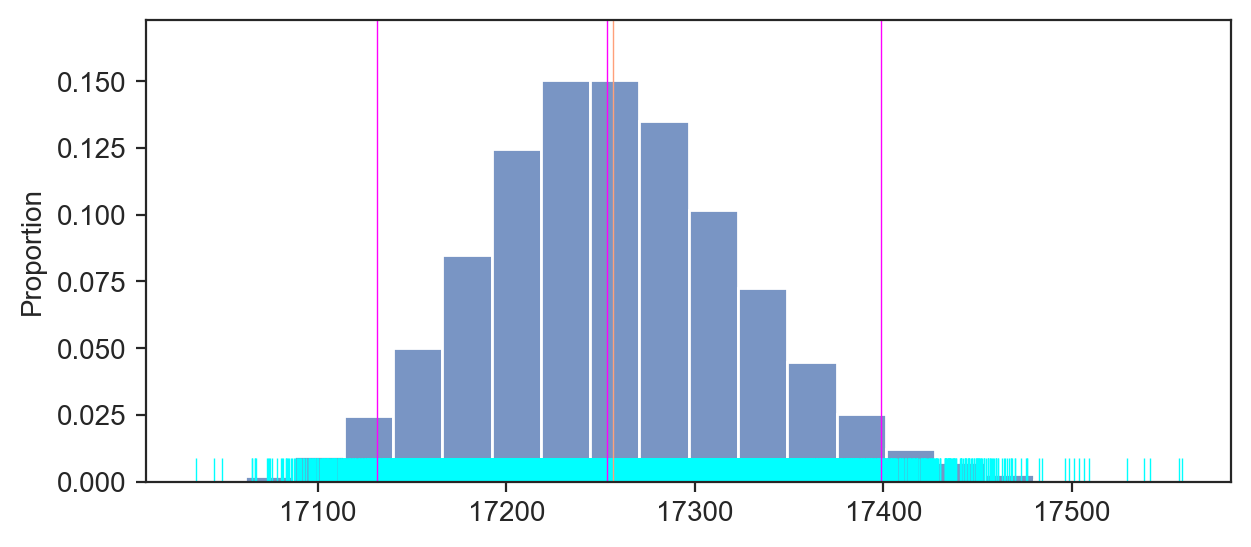

In [65]:
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.histplot(x=bootstrap_means, stat='proportion', bins=20)
sns.rugplot(x=bootstrap_means, ax=ax, color="aqua", height=0.05, linewidth=0.5);

ax.axvline(bootstrap_means.mean(), color="lightsalmon", linewidth=0.5)
ax.axvline(np.percentile(bootstrap_means, 2.5), color="fuchsia", linewidth=0.5)
ax.axvline(np.percentile(bootstrap_means, 50), color="fuchsia", linewidth=0.5)
ax.axvline(np.percentile(bootstrap_means, 97.5), color="fuchsia", linewidth=0.5)

In [66]:
#So, these are the mean and the confidence interval (at 95% level) of
print(adv['Price'].mean())
print(np.percentile(bootstrap_means, 2.5))
print(np.percentile(bootstrap_means, 97.5))
print(np.percentile(bootstrap_means, 50))

17256.717921130887
17131.551746462246
17398.87438795993
17253.636748305216


In [67]:
pq005 = adv['Price'].quantile(0.025)
pq995 = adv['Price'].quantile(0.975)
print(pq005,pq995)

1695.0 59995.0


In [68]:
adv.sort_values(['Price'], ascending=[False]).head(100)

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype,Milesperyear
public_reference,,,,,,,,,,,,
202006180262926,4400.0,NaN,White,Porsche,959,USED,2015.0,9999999,Coupe,0,Petrol,880.000000
202008112331147,46300.0,NaN,Blue,Ferrari,275,USED,2019.0,9999999,Coupe,0,Petrol,46300.000000
202001226429470,950.0,NaN,Black,Ferrari,LaFerrari,USED,2015.0,9999999,Coupe,0,Petrol,190.000000
202009103539048,100.0,NaN,Grey,Maserati,3500,USED,2018.0,9999999,Convertible,0,Petrol,50.000000
201812223434109,3600.0,NaN,Grey,Lamborghini,Miura,USED,2014.0,9999999,Coupe,0,Petrol,600.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
202006300684047,286.0,17,NaN,McLaren,675LT,USED,2017.0,449990,Convertible,0,Petrol,95.333333
201908080939230,38100.0,E,Red,Aston Martin,V8,USED,1988.0,445000,Convertible,0,Petrol,1190.625000
202005299637905,1942.0,J,Red,Jaguar,XJ220,USED,1992.0,445000,Coupe,0,Petrol,69.357143


In [69]:
ci1 = adv[(adv['Price'] >= pq005) & (adv['Price'] <= pq995)] #95% ci

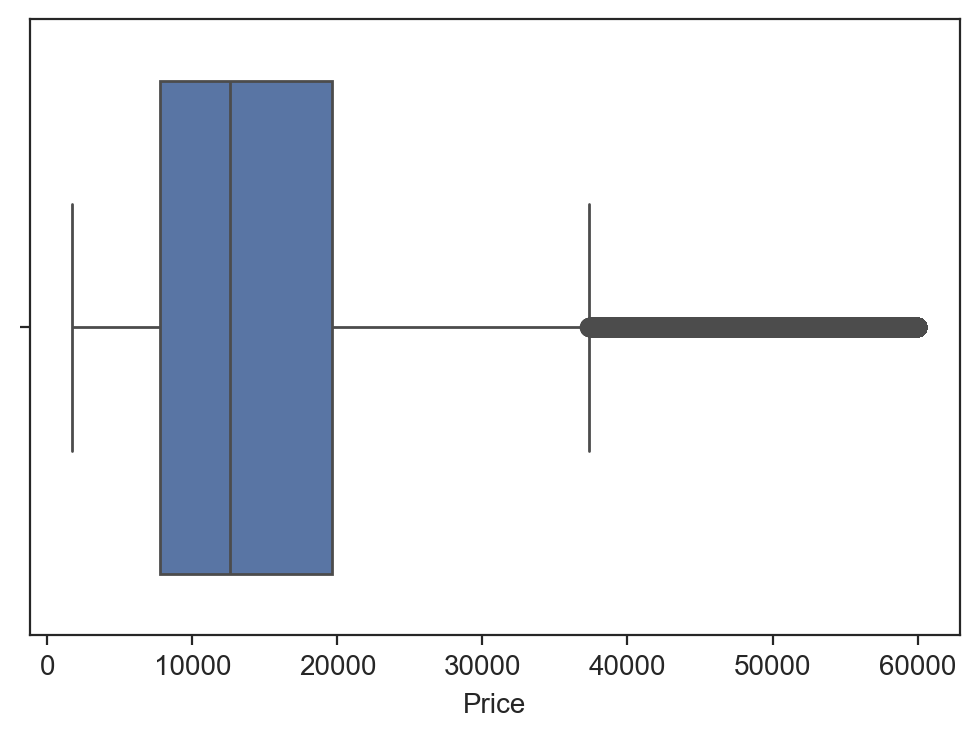

In [70]:
sns.boxplot(data=ci1, x='Price');
#5% confidence interval

In [71]:
pq006 = adv['Price'].quantile(0.005)
pq996 = adv['Price'].quantile(0.995)
print(pq006,pq996)

899.0 119950.0


In [72]:
ci2 = adv[(adv['Price'] >= pq005) & (adv['Price'] <= pq996)] #99% ci

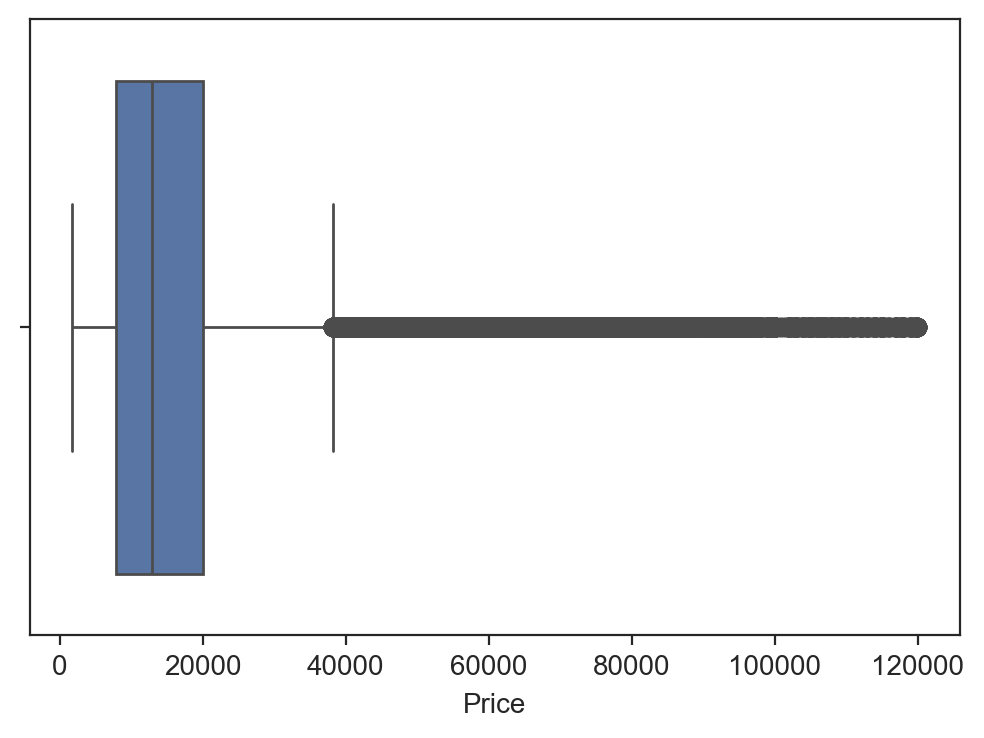

In [73]:
sns.boxplot(data=ci2, x='Price');

In [74]:
pq007 = adv['Price'].quantile(0.0005)
pq997 = adv['Price'].quantile(0.9995)
print(pq007,pq997)

495.0 299950.0


In [75]:
ci3 = adv[(adv['Price'] >= pq007) & (adv['Price'] <= pq997)] #99.9% ci

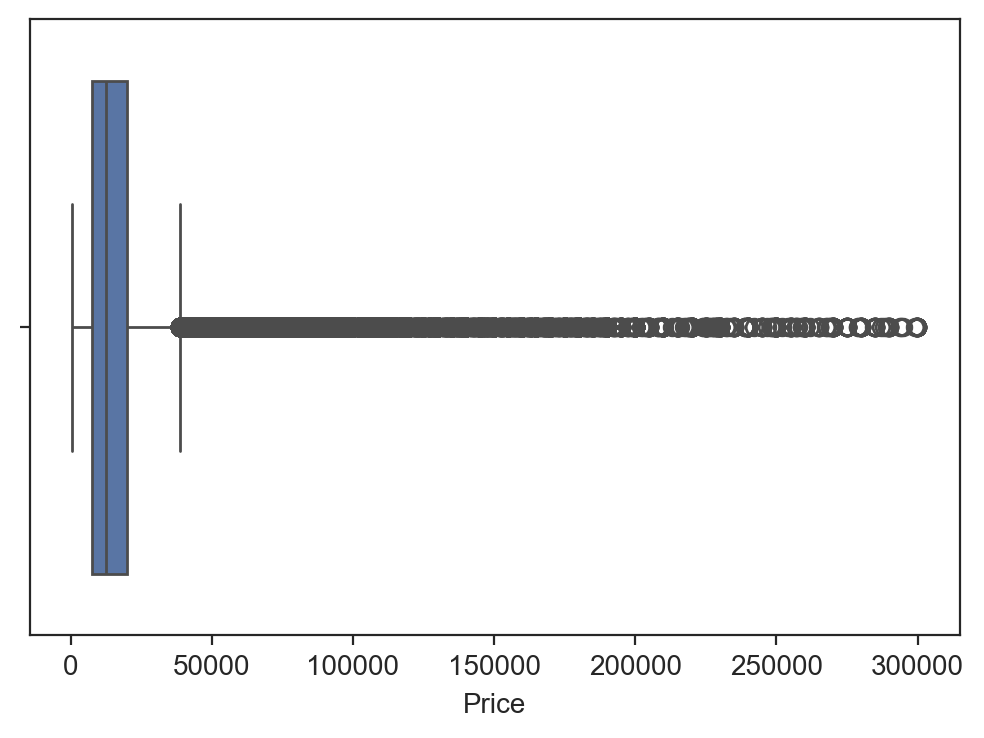

In [76]:
sns.boxplot(data=ci3, x='Price');

In [77]:
adv = adv[(adv['Price'] >= pq005) & (adv['Price'] <= pq995)] 
print(pq005,pq995)

1695.0 59995.0


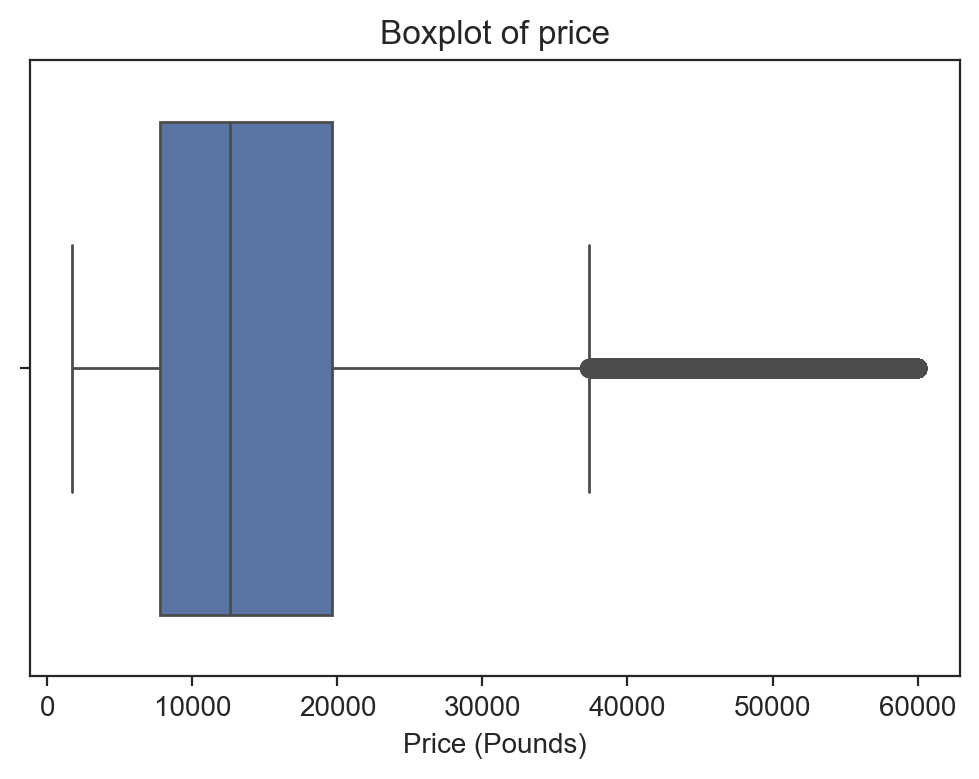

In [78]:
sns.boxplot(data=adv, x='Price');
plt.title('Boxplot of price')
plt.xlabel("Price (Pounds)")
plt.savefig('boxsfs.jpeg')


In [79]:
adv['Price'].describe().loc[['min', '25%', '50%', '75%', 'max']]

min     1695.0
25%     7750.0
50%    12599.0
75%    19600.0
max    59995.0
Name: Price, dtype: float64

In [80]:
adv.sort_values(['Price'], ascending=[False]).head(50)

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype,Milesperyear
public_reference,,,,,,,,,,,,
202009063385897,64.0,16,Black,Land Rover,Defender 110,USED,2016.0,59995,SUV,1,Diesel,16.000000
202010114882724,5000.0,68,Grey,BMW,i8,USED,2018.0,59995,Coupe,0,Petrol Plug-in Hybrid,2500.000000
202010165078004,0.0,NaN,Green,Land Rover,Defender 110,NEW,2020.0,59995,SUV,0,Diesel,0.000000
202007301890389,45000.0,05,Black,Ferrari,612,USED,2005.0,59995,Coupe,0,Petrol,3000.000000
202010024507460,10.0,70,Grey,Alfa Romeo,Giulia,USED,2020.0,59995,Saloon,0,Petrol,10.000000
202006180253963,12751.0,19,Red,Land Rover,Range Rover Sport,USED,2019.0,59995,SUV,0,Diesel,12751.000000
202008182647571,18887.0,18,Silver,Land Rover,Range Rover,USED,2018.0,59995,SUV,0,Diesel,9443.500000
202009143697919,3000.0,70,Grey,Audi,Q8,USED,2020.0,59995,SUV,0,Diesel,3000.000000
202009043329822,0.0,20,White,Alfa Romeo,Stelvio,USED,2020.0,59995,SUV,0,Petrol,0.000000


In [81]:
max_price = adv['Price'].max()
min_price = adv['Price'].min()

In [82]:
sdd = adv['Price'].quantile(0.875)
print(sdd)

26991.0


In [83]:
adv['Category'] = pd.cut(
    adv['Price'],
    bins=[min_price, 7750.00, 12599.00, 19600.00, 26991.0, max_price+0.1],
    labels=['Cheap', 'Lower', 'Medium', 'Upper','Expensive'],
    right=False, 
    include_lowest=True)

In [84]:
adv.columns

Index(['Mileage', 'Regcode', 'Colour', 'Make', 'Model', 'Vehicle condition',
       'Year of Registration', 'Price', 'Bodytype', 'Crossover car and van',
       'Fueltype', 'Milesperyear', 'Category'],
      dtype='object')

In [85]:
adv.sample(5)

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype,Milesperyear,Category
public_reference,,,,,,,,,,,,,
202010235350302,84000.0,13,NaN,SKODA,Fabia,USED,2013.0,3888,Hatchback,0,Petrol,12000.000000,Cheap
202007141240880,37905.0,12,Silver,Renault,Kangoo,USED,2012.0,5690,MPV,0,Petrol,4738.125000,Cheap
202010175123915,25337.0,15,Blue,Vauxhall,Mokka,USED,2015.0,8995,Hatchback,0,Petrol,5067.400000,Lower
202008042073864,116000.0,17,Black,SKODA,Octavia,USED,2017.0,7475,Hatchback,0,Diesel,38666.666667,Cheap
202009264244869,31864.0,64,Red,Toyota,Yaris,USED,2014.0,10995,Hatchback,0,Petrol Hybrid,5310.666667,Lower


In [86]:
adv['Vehicle condition'] = adv['Vehicle condition'].replace('USED', '0')
adv['Vehicle condition'] = adv['Vehicle condition'].replace('NEW', '1')

In [87]:
adv['Vehicle condition'] = adv['Vehicle condition'].astype(int)

In [88]:
adv["AvgModelUsed"] = adv[adv['Vehicle condition'] == 0].groupby(['Model'])['Price'].transform('mean')

In [89]:
adv["AvgModelUsed"] = adv["AvgModelUsed"].fillna(adv.groupby('Model')['AvgModelUsed'].transform("mean"))

In [90]:
adv["AvgModelUsed"].describe().loc[['min', '25%', '50%', '75%', 'max']]

min     1695.000000
25%     9004.132957
50%    12777.380439
75%    17743.461915
max    59995.000000
Name: AvgModelUsed, dtype: float64

In [91]:
adv["AvgModelNew"] = adv[adv['Vehicle condition'] == 1].groupby(['Model'])['Price'].transform('mean')

In [92]:
adv["AvgModelNew"] = adv["AvgModelNew"].fillna(adv.groupby("Model")['AvgModelNew'].transform("mean"))

In [93]:
adv["AvgModelNew"].describe().loc[['min', '25%', '50%', '75%', 'max']]

min     9512.260417
25%    21254.368421
50%    26515.833333
75%    36482.636364
max    59995.000000
Name: AvgModelNew, dtype: float64

In [94]:
adv["AvgMakeNew"] = adv[adv['Vehicle condition'] == 1].groupby(['Make'])['Price'].transform('mean')

In [95]:
adv["AvgMakeNew"] = adv["AvgMakeNew"].fillna(adv.groupby("Make")['AvgMakeNew'].transform("mean"))

In [96]:
adv["AvgMakeNew"].describe().loc[['min', '25%', '50%', '75%', 'max']]

min    14444.967857
25%    23062.112903
50%    25455.058239
75%    38410.752920
max    59995.000000
Name: AvgMakeNew, dtype: float64

In [97]:
adv["AvgMakeUsed"] = adv[adv['Vehicle condition'] == 0].groupby(['Make'])['Price'].transform('mean')

In [98]:
adv["AvgMakeUsed"] = adv["AvgMakeUsed"].fillna(adv.groupby("Make")['AvgMakeUsed'].transform("mean"))

In [99]:
adv["AvgMakeUsed"].describe().loc[['min', '25%', '50%', '75%', 'max']]

min     1850.000000
25%    10960.223869
50%    12516.235609
75%    17827.095737
max    59990.000000
Name: AvgMakeUsed, dtype: float64

In [100]:
adv.sample(5)

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype,Milesperyear,Category,AvgModelUsed,AvgModelNew,AvgMakeNew,AvgMakeUsed
public_reference,,,,,,,,,,,,,,,,,
202009304420934,21489.0,68,Black,Vauxhall,Mokka X,0,2018.0,11495,SUV,0,Petrol,10744.5,Lower,11500.131401,NaN,21866.669734,8132.159180
202008102320957,38000.0,65,Black,Suzuki,Celerio,0,2015.0,4499,Hatchback,0,Petrol,7600.0,Cheap,5672.631922,NaN,18933.115108,8800.043540
202010084752236,45826.0,66,Black,Audi,A1,0,2016.0,9995,Hatchback,0,Petrol,11456.5,Lower,12192.048120,26516.515152,37795.859361,17329.146017
202008262955723,52551.0,66,White,Mercedes-Benz,C Class,0,2017.0,13800,Estate,0,Diesel,17517.0,Medium,18676.497918,39781.257732,38410.752920,19259.519050
202010044587548,9496.0,69,Blue,Audi,Q5,0,2020.0,36499,SUV,0,Diesel,9496.0,Expensive,22332.624611,48601.237500,37795.859361,17329.146017


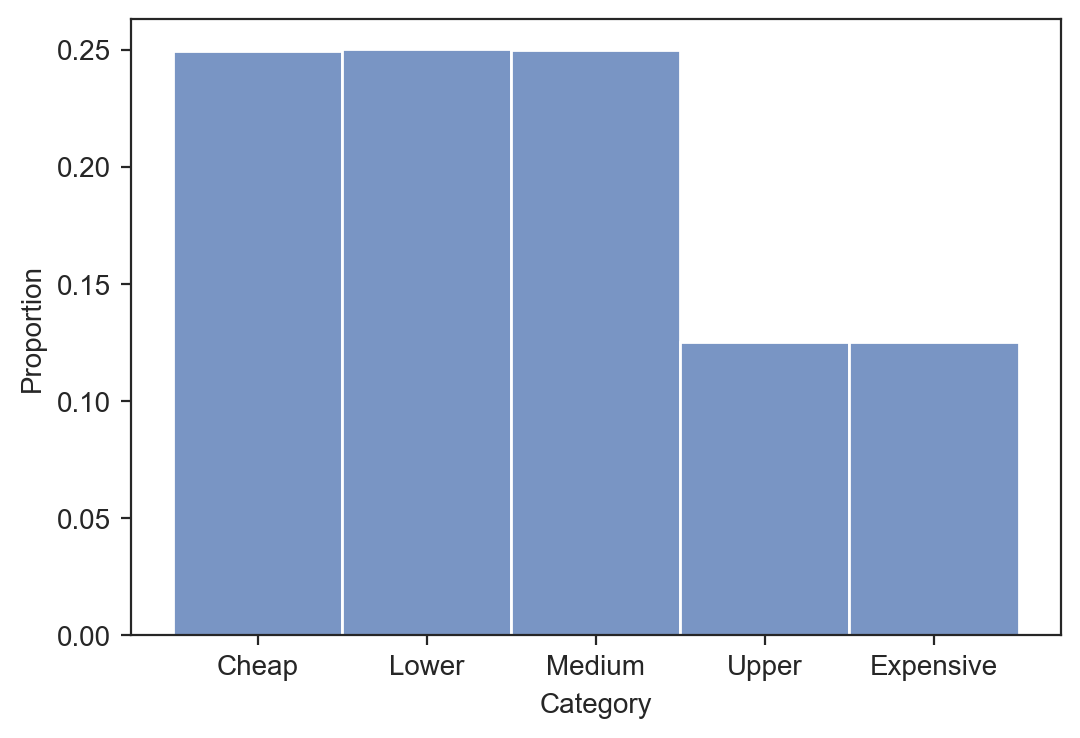

In [101]:
sns.histplot(adv['Category'], stat='proportion');
#reason we are going to do cars by make and not actual price is that different factors can determine the price - 

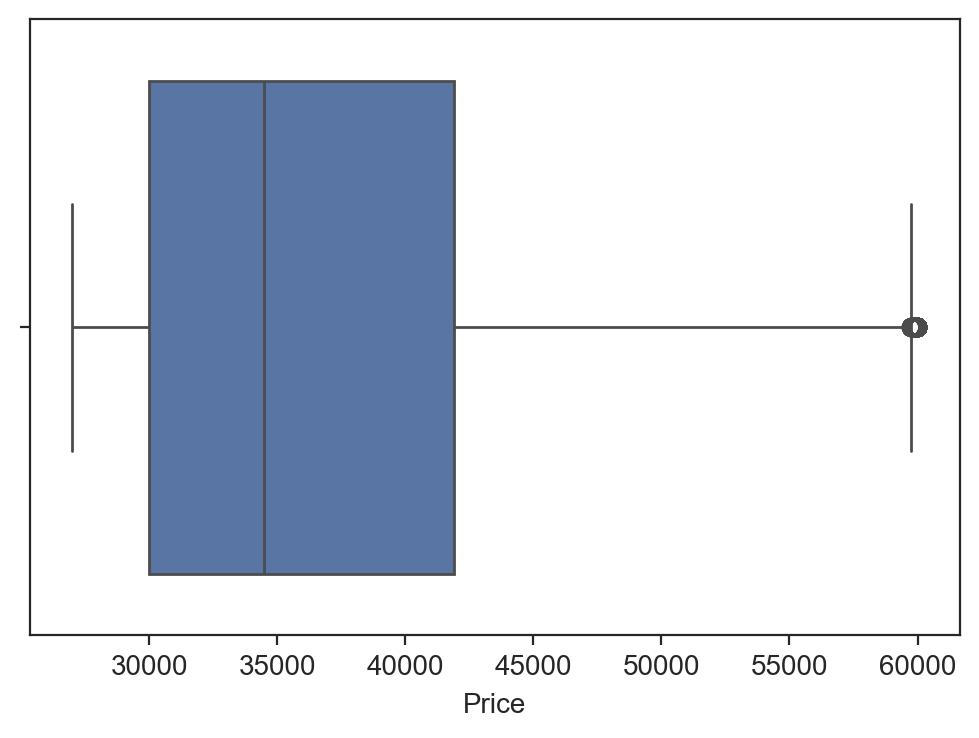

In [102]:
sns.boxplot(data=(adv.loc[ adv['Category']=='Expensive']), x='Price');
#going to have to reduce distribution even further

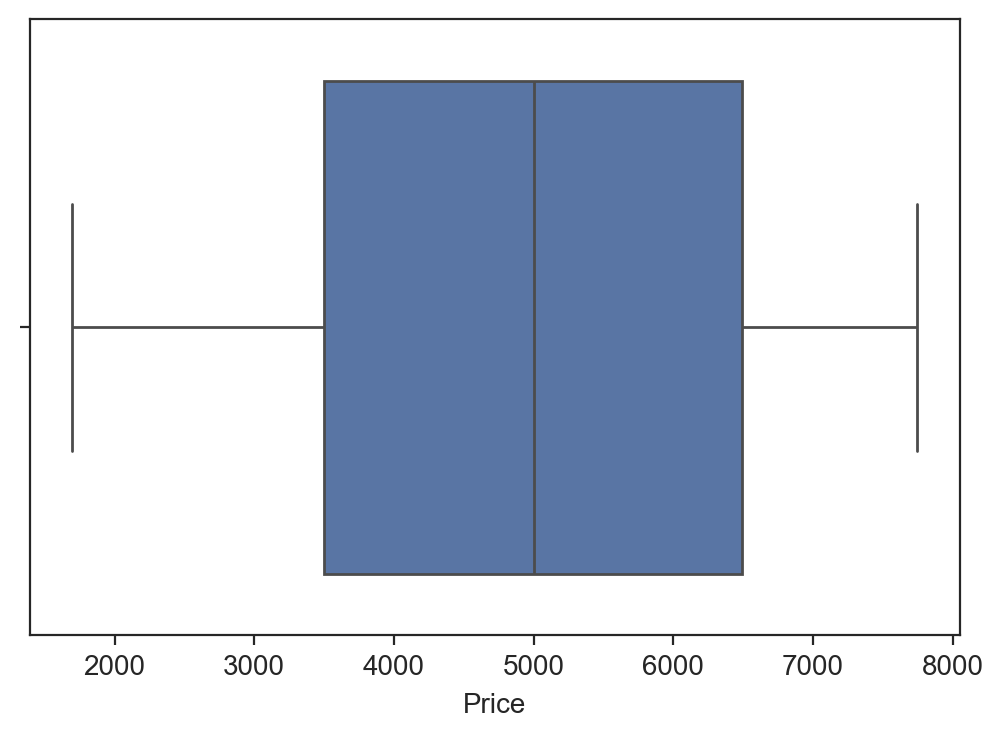

In [103]:
sns.boxplot(data=(adv.loc[ adv['Category']=='Cheap']), x='Price');

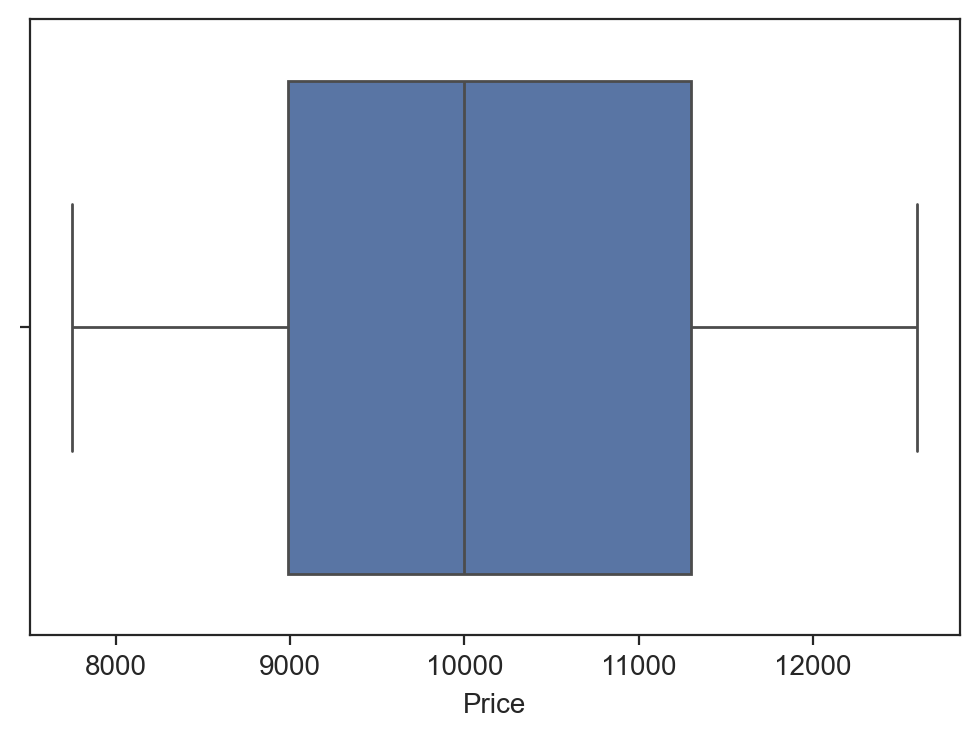

In [104]:
sns.boxplot(data=(adv.loc[ adv['Category']=='Lower']), x='Price');

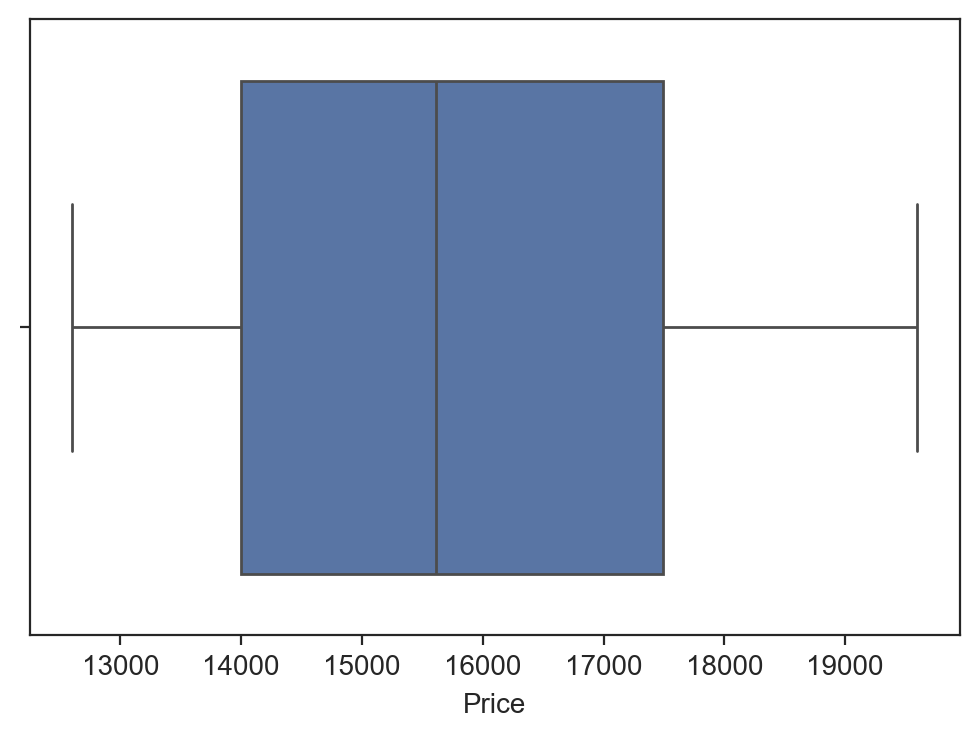

In [105]:
sns.boxplot(data=(adv.loc[ adv['Category']=='Medium']), x='Price');

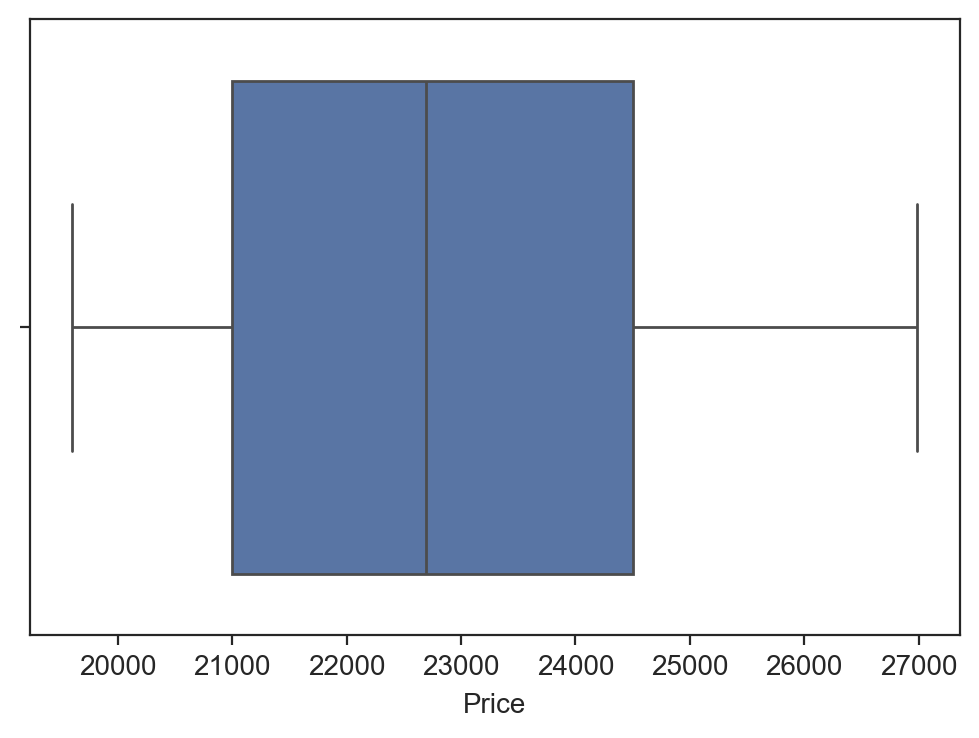

In [106]:
sns.boxplot(data=(adv.loc[ adv['Category']=='Upper']), x='Price');

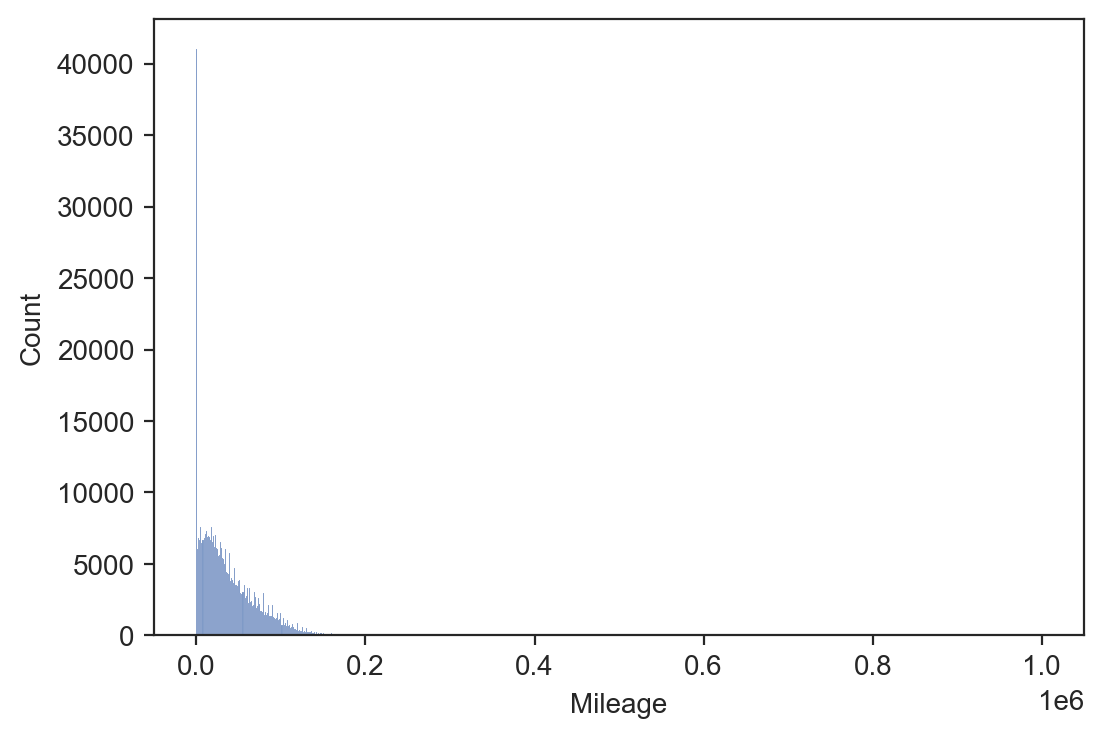

In [107]:
sns.histplot(data=adv, x='Mileage');

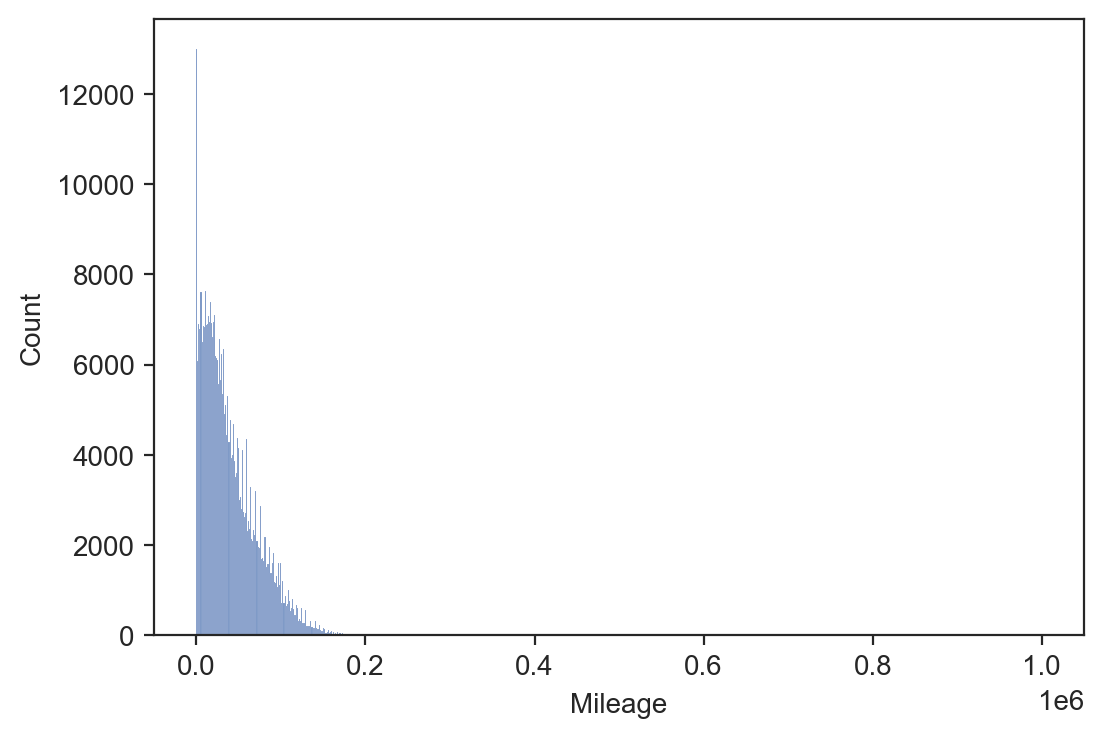

In [108]:
sns.histplot(data=(adv.loc[ adv['Vehicle condition']==0]), x='Mileage');

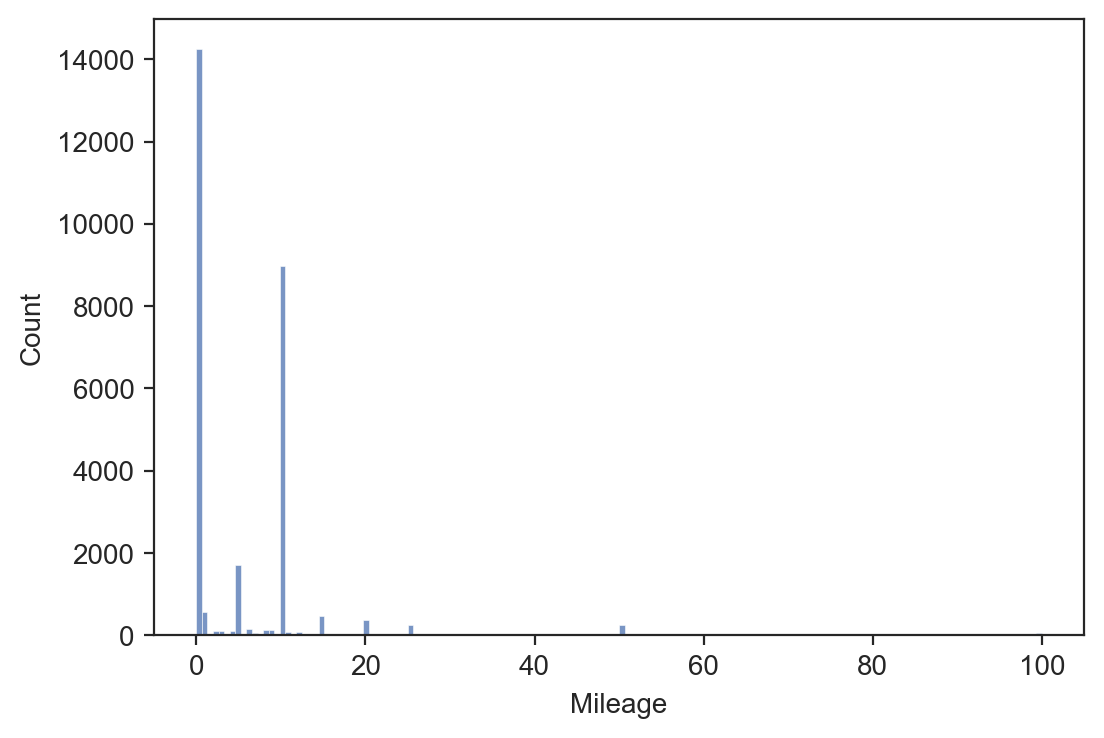

In [109]:
sns.histplot(data=(adv.loc[ adv['Vehicle condition']==1]), x='Mileage');
#cars that have 25 milegage are still classified as new. this lets us know that vehicle condition is not based off number of miles drivien but if the car has bee owned before


In [110]:
new_cars = (adv.loc[ adv['Vehicle condition']==1])

In [111]:
used_cars = (adv.loc[ adv['Vehicle condition']==0])

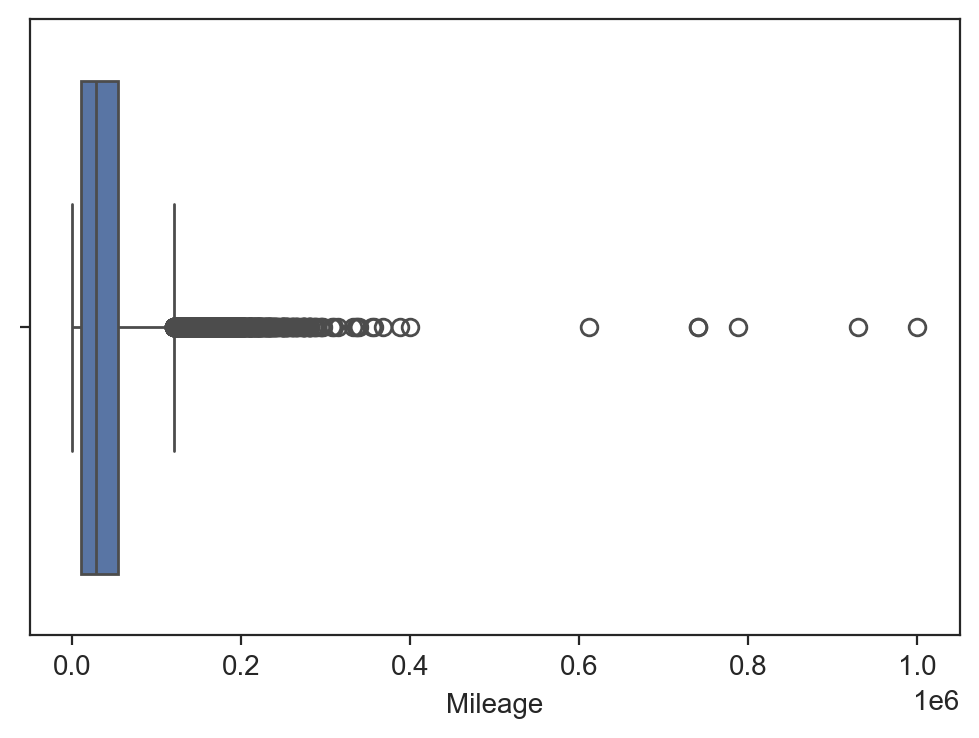

In [112]:
sns.boxplot(data=adv, x='Mileage');

In [113]:
adv.sort_values(['Mileage'], ascending=[False]).head(70)

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype,Milesperyear,Category,AvgModelUsed,AvgModelNew,AvgMakeNew,AvgMakeUsed
public_reference,,,,,,,,,,,,,,,,,
202008122406434,999999.0,63,White,Vauxhall,Astra,0,2013.0,9999,Hatchback,0,Diesel,142857.000000,Lower,8032.337035,19314.638889,21866.669734,8132.159180
202010285542410,930000.0,56,Blue,BMW,1 Series,0,2006.0,2500,Hatchback,0,Petrol,66428.571429,Cheap,12777.380439,31220.186813,41582.747582,17827.095737
202010064664710,788072.0,68,Blue,MINI,Countryman,0,2018.0,22875,SUV,0,Petrol,394036.000000,Upper,14511.001742,31498.220339,26424.092262,12066.129628
202009244163289,740000.0,11,White,Mercedes-Benz,E Class,0,2011.0,10500,Convertible,0,Diesel,82222.222222,Lower,19259.010753,48218.966667,38410.752920,19259.519050
202010215262290,740000.0,14,Blue,Volvo,XC90,0,2014.0,14795,SUV,0,Diesel,123333.333333,Medium,30971.375000,54831.280851,45602.357143,20154.243090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202009304399425,248000.0,15,Silver,Volkswagen,Transporter Shuttle,0,2015.0,11950,Minibus,1,Diesel,49600.000000,Lower,20075.102041,43800.000000,25017.642182,13331.667592
202009053349571,246000.0,14,Blue,Mercedes-Benz,E Class,0,2014.0,6950,Estate,0,Diesel,41000.000000,Cheap,19259.010753,48218.966667,38410.752920,19259.519050
202008132432020,245132.0,62,Silver,Volkswagen,Phaeton,0,2013.0,4989,Saloon,0,Diesel,35018.857143,Cheap,7890.035714,NaN,25017.642182,13331.667592


In [114]:
#So, these are the mean and the confidence interval (at 95% level) of
print(adv['Price'].mean())
print(np.percentile(bootstrap_means, 2.5))
print(np.percentile(bootstrap_means, 97.5))
print(np.percentile(bootstrap_means, 50))

15197.147104047863
17131.551746462246
17398.87438795993
17253.636748305216


In [115]:
m007 = adv['Mileage'].quantile(0.0005)
m997 = adv['Mileage'].quantile(0.9995)
print(m007,m997)
mi3 = adv[(adv['Price'] <= pq997)]

0.0 201885.47800000035


In [116]:
m006 = adv['Mileage'].quantile(0.005)
m996 = adv['Mileage'].quantile(0.995)
print(m006,m996)

0.0 150000.0


In [117]:
adv = (adv.loc[ adv['Mileage']<=m996])

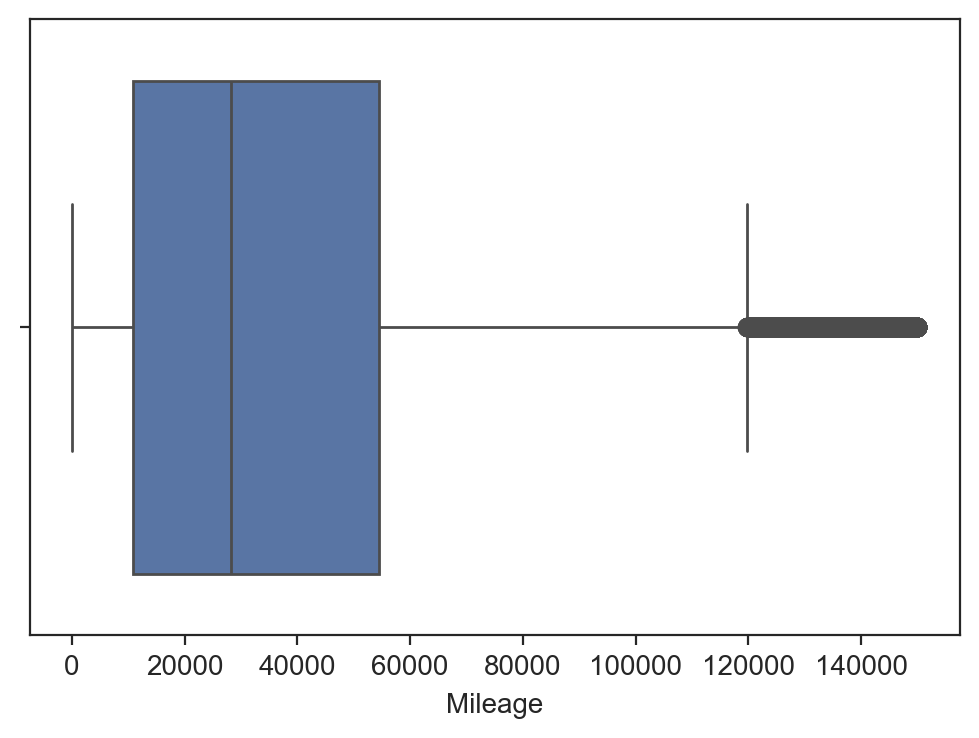

In [118]:
sns.boxplot(data=adv, x='Mileage');

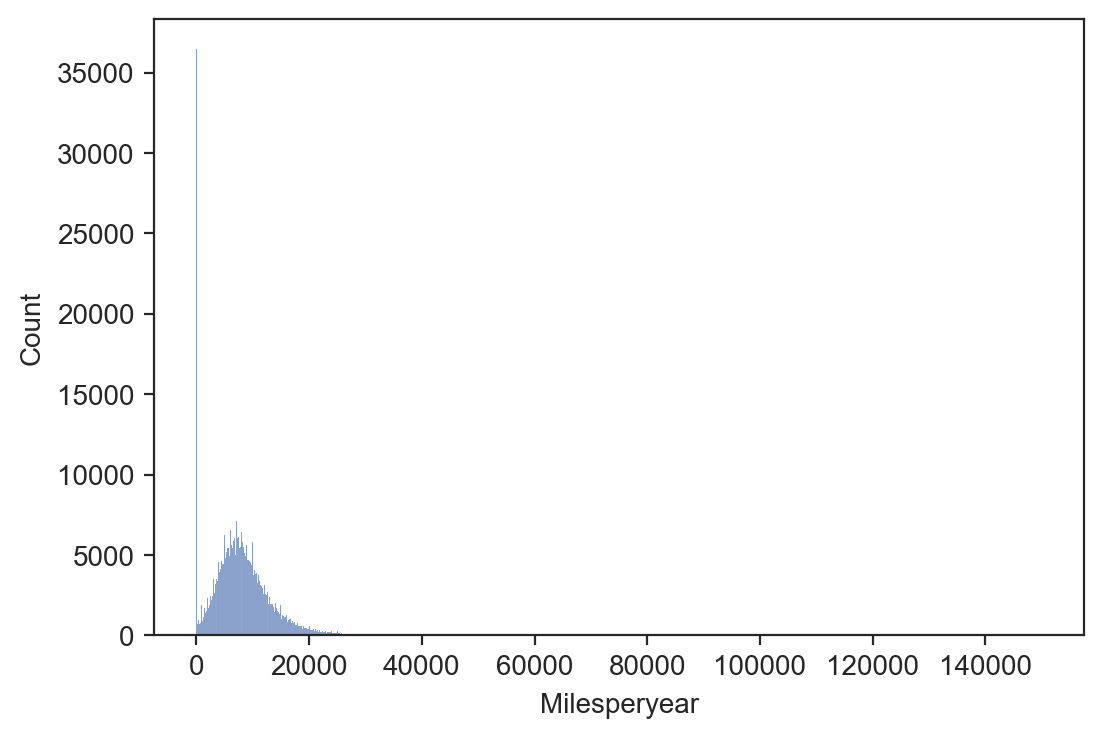

In [119]:
sns.histplot(data=adv, x='Milesperyear');
#appeas somewhat normally distrubted where values arent 0
#may need to remove 0

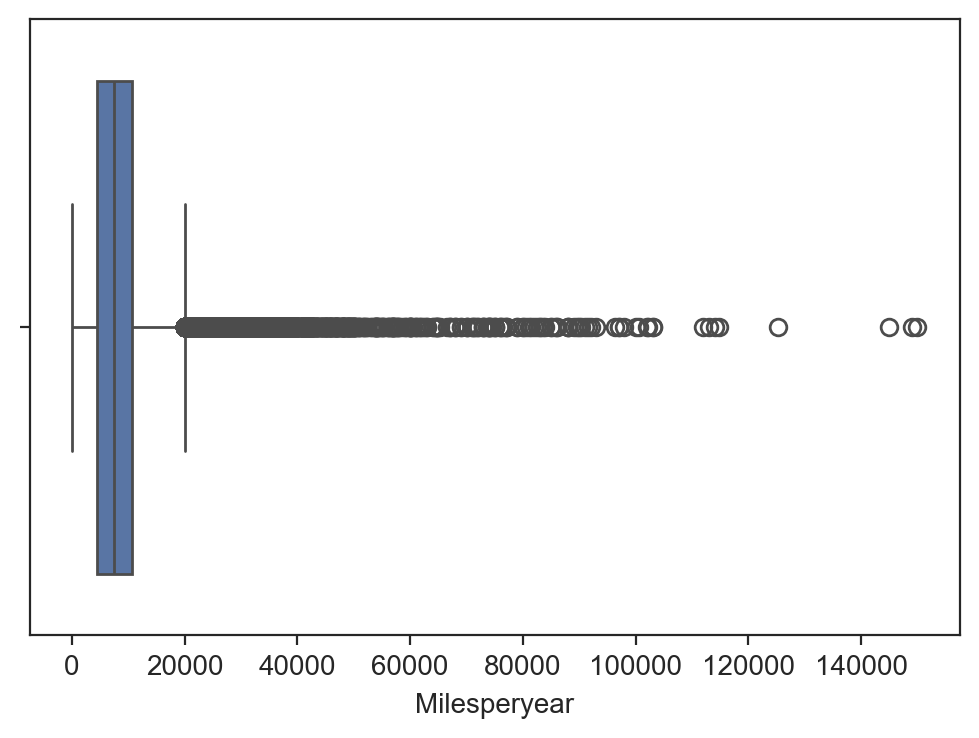

In [120]:
sns.boxplot(data=adv, x='Milesperyear');

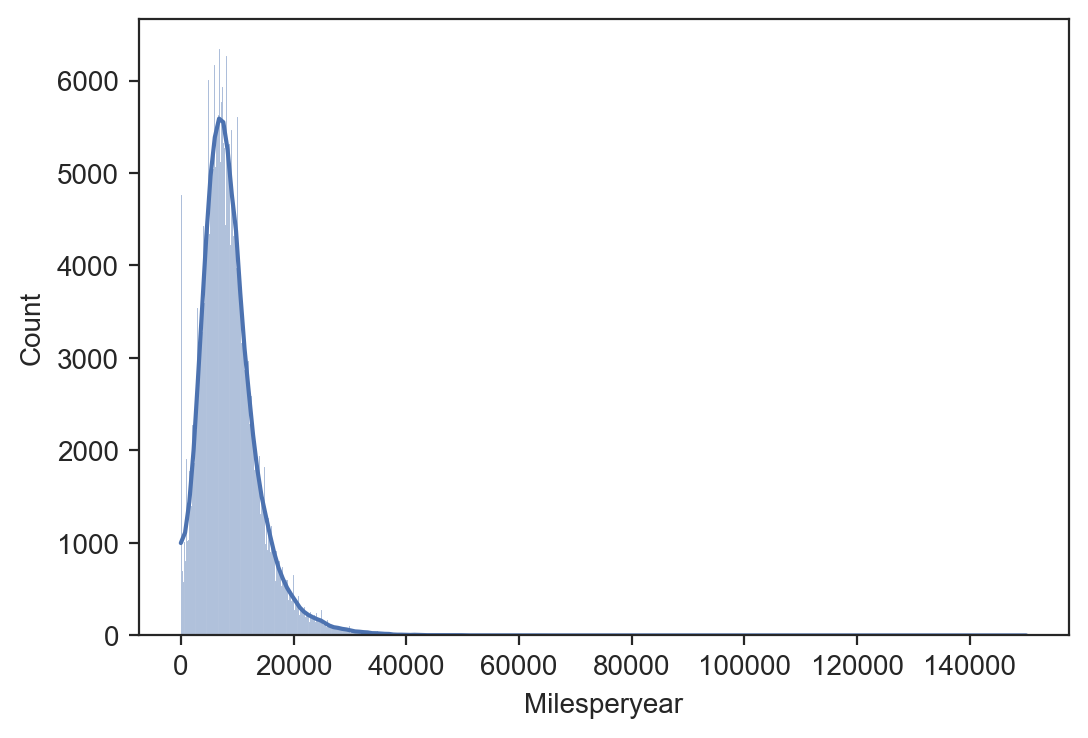

In [121]:

sns.histplot(data=adv.query("Milesperyear>10"), x='Milesperyear',
             common_norm=False, kde=True);


In [122]:
adv.sample(5) 

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype,Milesperyear,Category,AvgModelUsed,AvgModelNew,AvgMakeNew,AvgMakeUsed
public_reference,,,,,,,,,,,,,,,,,
202009113591258,500.0,70,Grey,Volvo,XC90,0,2020.0,42900,SUV,0,Diesel Hybrid,500.000000,Expensive,30971.375000,54831.280851,45602.357143,20154.243090
202009224036295,43716.0,16,White,Toyota,Auris,0,2016.0,12995,Estate,0,Petrol Hybrid,10929.000000,Medium,10115.184557,NaN,26165.958333,11008.678971
202010054622165,15207.0,17,Red,Nissan,Juke,0,2017.0,10800,SUV,0,Petrol,5069.000000,Lower,9640.940448,21464.630094,22926.894273,10960.223869
202010175104203,34588.0,17,Black,Volkswagen,Golf,0,2017.0,12798,Hatchback,0,Petrol,11529.333333,Medium,13654.083646,25818.740240,25017.642182,13331.667592
202009183908880,5352.0,19,Blue,BMW,4 Series Gran Coupe,0,2019.0,26780,Saloon,0,Diesel,5352.000000,Upper,20389.095541,38564.782609,41582.747582,17827.095737


In [123]:
features_to_corr = [ "Mileage",
        "Year of Registration",
        "Vehicle condition",
        "Price",
                    "Milesperyear", 'AvgModelUsed',
       'AvgModelNew', 'AvgMakeNew',
       'AvgMakeUsed'
                
                   ]

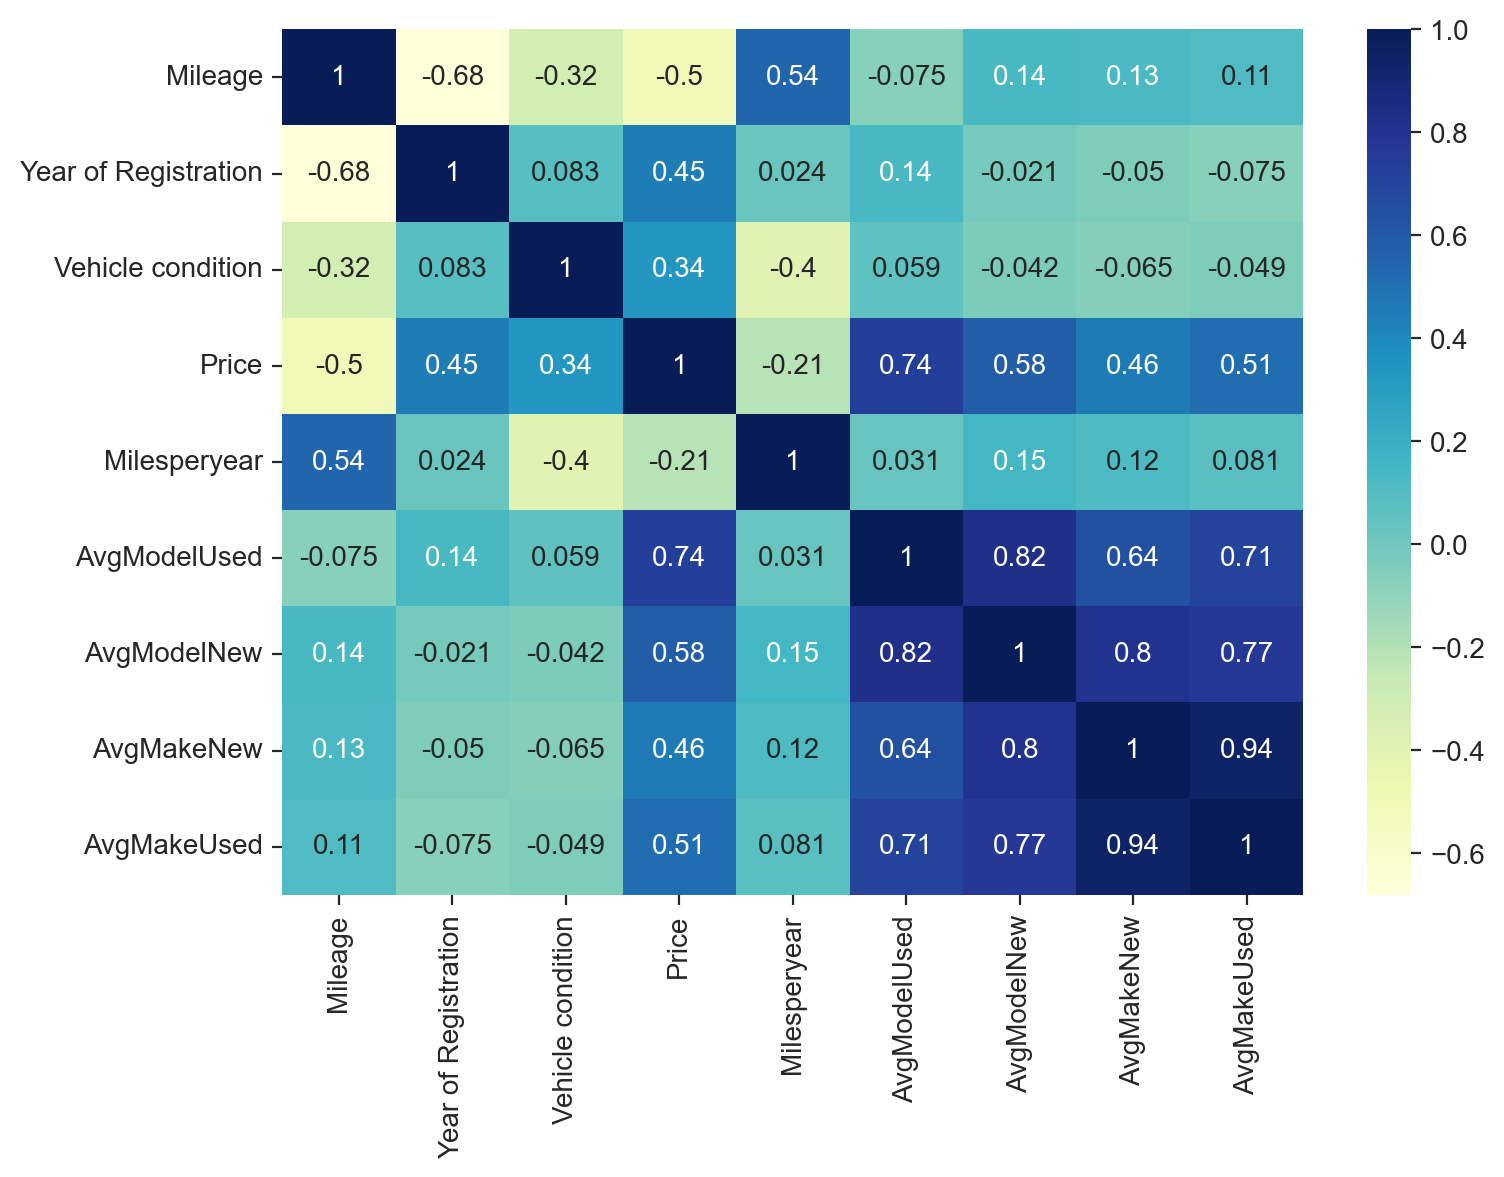

In [124]:
plt.subplots(figsize=(8,6))
sns.heatmap(adv[features_to_corr].corr(), cmap="YlGnBu", annot=True)
plt.tight_layout()
plt.savefig('heatmap1.jpeg')

In [125]:
ewe = adv.groupby('Year of Registration')['Price'].mean()

In [126]:
ewe.head(5)

Year of Registration
1986.0    16286.115385
1987.0    17761.593750
1988.0    19009.473684
1989.0    18290.103448
1990.0    19019.333333
Name: Price, dtype: float64

In [127]:
ewe = ewe.reset_index()

In [128]:
ewe = ewe.set_index('Year of Registration')

In [129]:
ewe.head(50)

,Price
Year of Registration,
1986.0,16286.115385
1987.0,17761.593750
1988.0,19009.473684
1989.0,18290.103448
1990.0,19019.333333
1991.0,15261.526316
1992.0,12222.784615
1993.0,17961.098039
1994.0,16213.602564


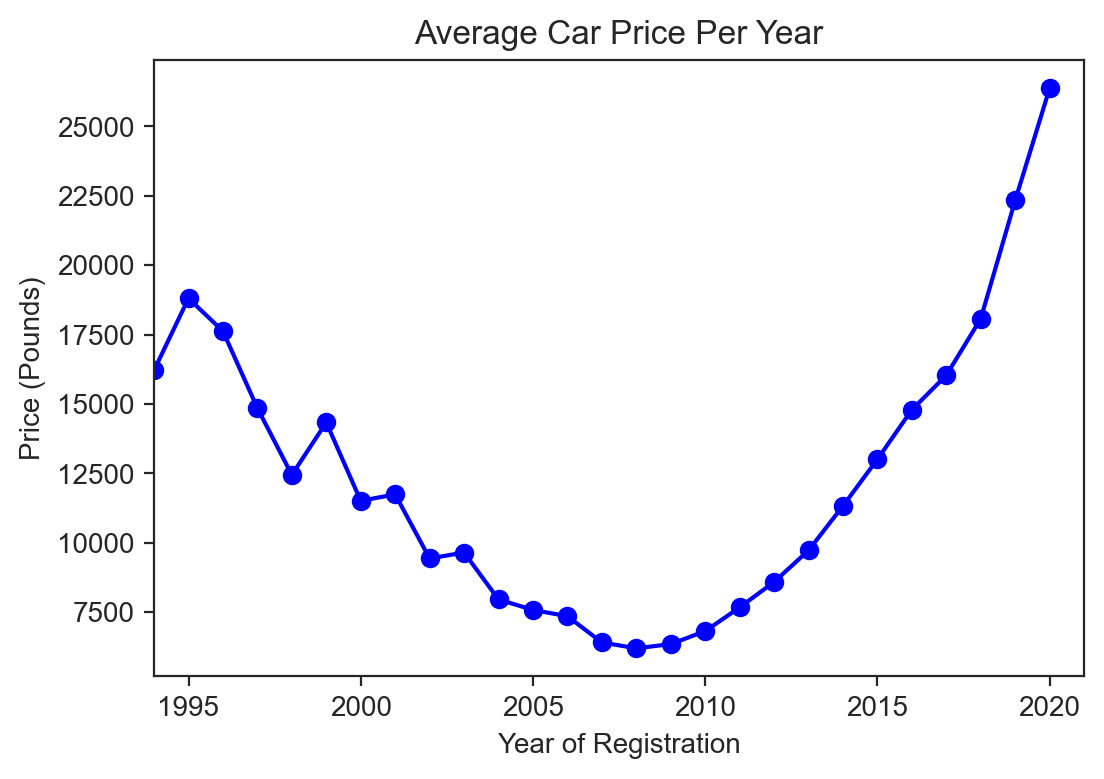

In [130]:
ax = ewe['Price'].plot.line(marker='o', legend=False, color='blue', linestyle='solid', markerfacecolor='blue')
ax.set_title('Average Car Price Per Year')
ax.set_xlabel('Year of Registration')
ax.set_ylabel('Price (Pounds)');
plt.xlim(1994, 2021)
plt.savefig('adad.jpeg')

In [131]:
#categorical quantitative

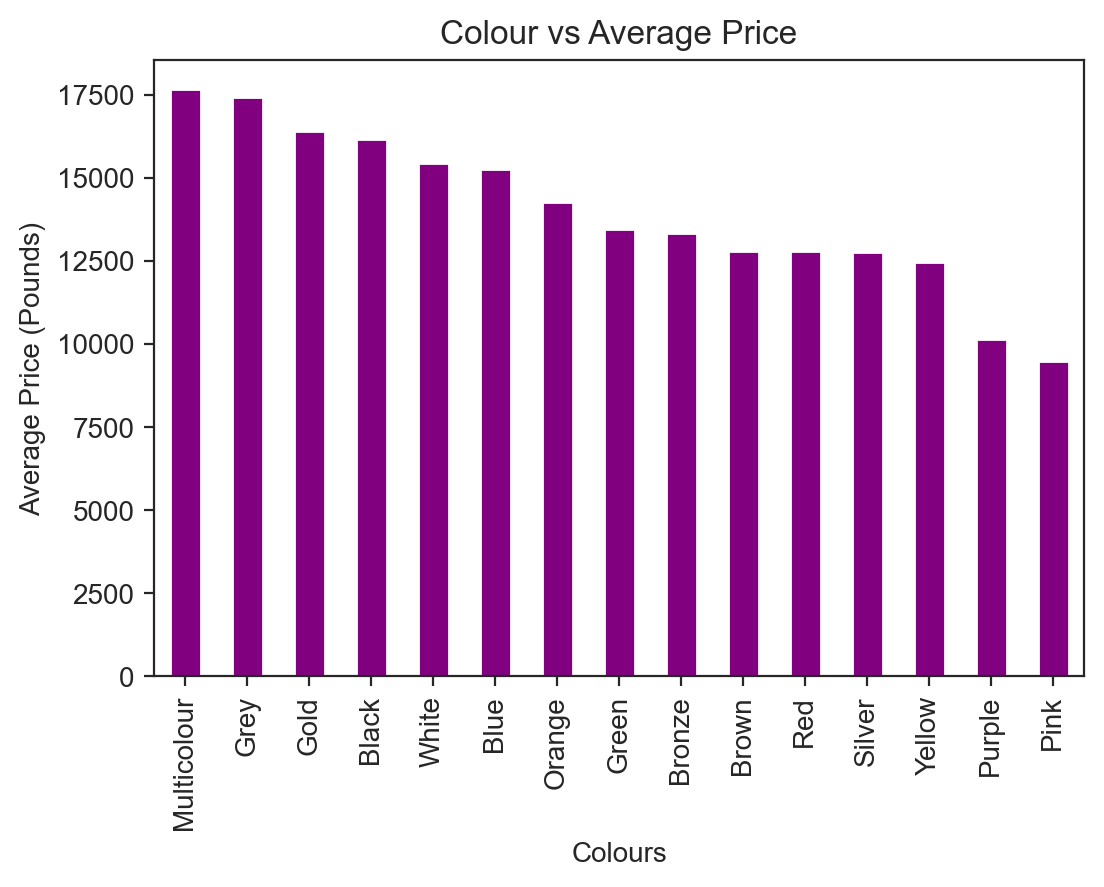

In [132]:
df = pd.DataFrame(adv.groupby(['Colour'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(color='purple', legend=False,)
plt.title('Colour vs Average Price')
plt.xlabel("Colours")
plt.ylabel("Average Price (Pounds)");
plt.savefig('sfdss.jpeg', dpi=300, bbox_inches = "tight")
plt.show()

<Figure size 2500x600 with 0 Axes>

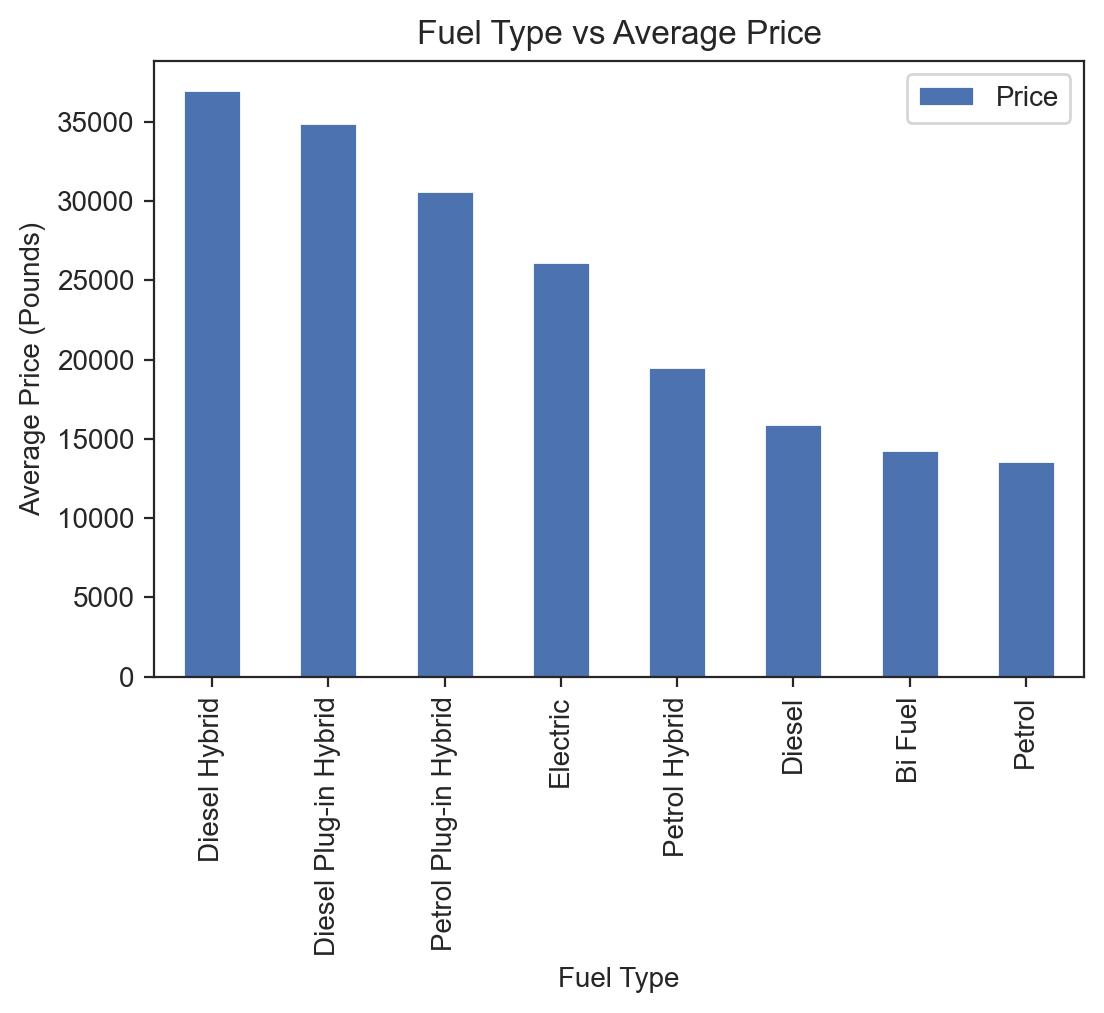

In [133]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(adv.groupby(['Fueltype'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.xlabel("Fuel Type")
plt.ylabel("Average Price (Pounds)")
#plt.tight_layout()
plt.savefig('sads.jpeg', dpi=300, bbox_inches = "tight")



In [134]:
ad3 = adv.groupby('Make')['Mileage'].mean()
ad3.head(5)

Make
AK             3000.000000
Abarth        16477.090129
Aixam         14822.000000
Alfa Romeo    35400.787122
Alpine         1370.545455
Name: Mileage, dtype: float64

In [135]:
ad4 = adv.groupby('Make')['Price'].mean()
ad4.head(5)

Make
AK            44995.000000
Abarth        15463.889270
Aixam          4147.500000
Alfa Romeo    19086.697109
Alpine        53551.060606
Name: Price, dtype: float64

In [136]:
Carmake = pd.concat([ad4, ad3], axis='columns')
Carmake

,Price,Mileage
Make,,
AK,44995.000000,3000.000000
Abarth,15463.889270,16477.090129
Aixam,4147.500000,14822.000000
Alfa Romeo,19086.697109,35400.787122
Alpine,53551.060606,1370.545455
...,...,...
Vauxhall,8559.355931,37090.227392
Volkswagen,14347.729858,36868.552889
Volvo,24292.248857,32026.535028


In [137]:
Carmake = Carmake.reset_index()

In [138]:
Carmake.columns

Index(['Make', 'Price', 'Mileage'], dtype='object')

In [139]:
Carmake = Carmake.set_axis([
    'Make', 'Price', 'AvgMileage'
], axis='columns')

In [140]:
Carmake.head(10) 

,Make,Price,AvgMileage
0,AK,44995.000000,3000.000000
1,Abarth,15463.889270,16477.090129
2,Aixam,4147.500000,14822.000000
3,Alfa Romeo,19086.697109,35400.787122
4,Alpine,53551.060606,1370.545455
5,Ariel,42996.333333,16220.666667
6,Aston Martin,39776.682594,36654.607509
7,Audi,18752.342219,42263.115663
8,Austin,5510.000000,52943.444444
9,BMW,18625.288169,44311.044079


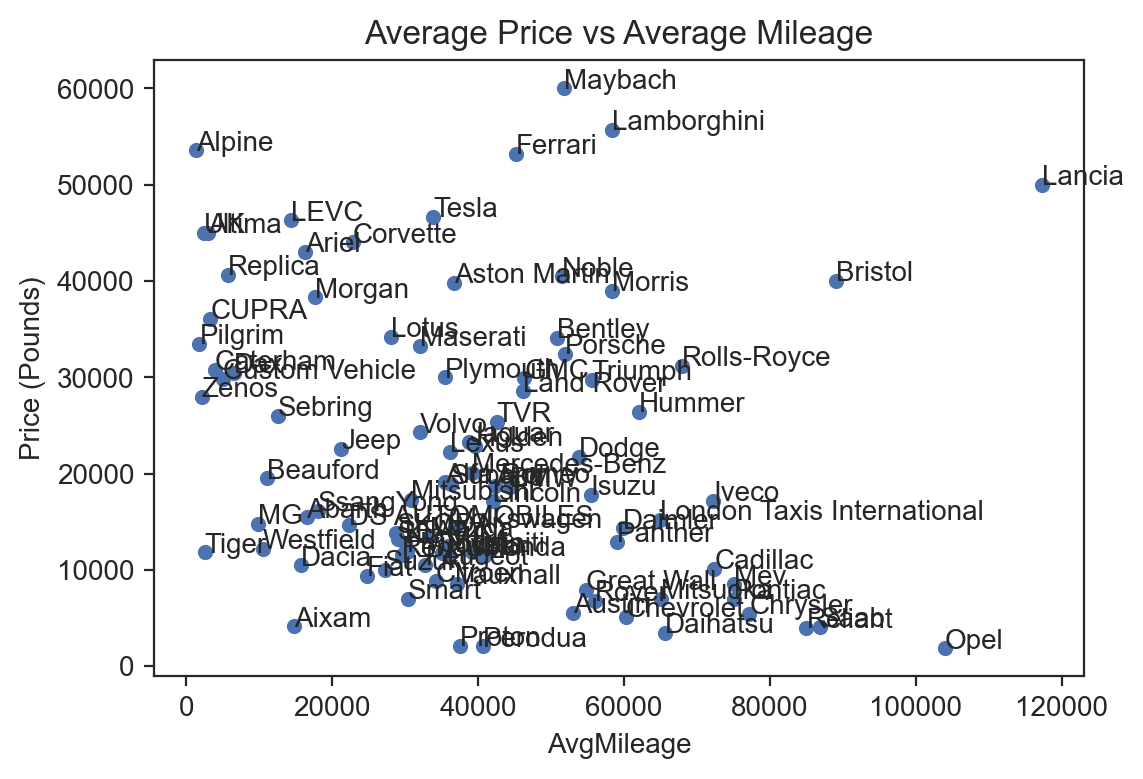

In [141]:
#create scatter plot of x vs. y
ax = Carmake.plot(kind='scatter', x='AvgMileage', y='Price')
ax.set_title('Average Price vs Average Mileage')
ax.set_xlabel('AvgMileage')
ax.set_ylabel('Price (Pounds)');
#label each point in scatter plot
for idx, row in Carmake.iterrows():
    ax.annotate(row['Make'], (row['AvgMileage'], row['Price']))
    #https://www.statology.org/pandas-scatter-plot-label-points/
#this works for standard_makes

In [142]:
ad6 = adv.groupby('Model')['AvgModelNew'].mean()
ad6.head(5)

Model
1 Series    31220.186813
100                  NaN
1007                 NaN
106                  NaN
107                  NaN
Name: AvgModelNew, dtype: float64

In [143]:
ad7 = adv.groupby('Model')['AvgModelUsed'].mean()
ad7.head(5)

Model
1 Series    12777.380439
100          1999.000000
1007         2038.333333
106          3368.000000
107          2931.322727
Name: AvgModelUsed, dtype: float64

In [144]:
ad8 = adv.groupby('Model')['Mileage'].mean()
ad8.head(5)

Model
1 Series    44316.468137
100         25014.000000
1007        49357.833333
106         51695.250000
107         54337.945455
Name: Mileage, dtype: float64

In [145]:
Carmodel = pd.concat([ad7, ad6, ad8], axis='columns')
Carmodel.head(50)

,AvgModelUsed,AvgModelNew,Mileage
Model,,,
1 Series,12777.380439,31220.186813,44316.468137
100,1999.000000,NaN,25014.000000
1007,2038.333333,NaN,49357.833333
106,3368.000000,NaN,51695.250000
107,2931.322727,NaN,54337.945455
108,6755.648160,10894.629213,18941.982906
11,5995.000000,NaN,53011.000000
110,12173.125000,NaN,55226.000000
124 Spider,16078.445205,NaN,15286.376712


In [146]:
Carmodel['differences'] = Carmodel['AvgModelNew']- Carmodel['AvgModelUsed']

In [147]:
Carmodel.head(50)

,AvgModelUsed,AvgModelNew,Mileage,differences
Model,,,,
1 Series,12777.380439,31220.186813,44316.468137,18442.806374
100,1999.000000,NaN,25014.000000,NaN
1007,2038.333333,NaN,49357.833333,NaN
106,3368.000000,NaN,51695.250000,NaN
107,2931.322727,NaN,54337.945455,NaN
108,6755.648160,10894.629213,18941.982906,4138.981053
11,5995.000000,NaN,53011.000000,NaN
110,12173.125000,NaN,55226.000000,NaN
124 Spider,16078.445205,NaN,15286.376712,NaN


In [148]:
Carmodel = Carmodel.reset_index()

In [149]:
Carmodel.columns

Index(['Model', 'AvgModelUsed', 'AvgModelNew', 'Mileage', 'differences'], dtype='object')

In [150]:
Carmodel = Carmodel.set_axis([
    'Model', 'AvgModelUsed', 'AvgModelNew', 'AvgMileage', 'Differences'
], axis='columns')

In [151]:
Carmodel.sample(5)

,Model,AvgModelUsed,AvgModelNew,AvgMileage,Differences
399,Firebird,6990.000000,NaN,75000.000000,NaN
347,Discovery 4,20881.138376,NaN,75074.223062,NaN
669,RS Q3,34219.385542,55349.327273,17927.014493,21129.941731
289,Citigo,6455.464061,20993.333333,26958.187186,14537.869273
550,MXR,26000.000000,NaN,12500.000000,NaN


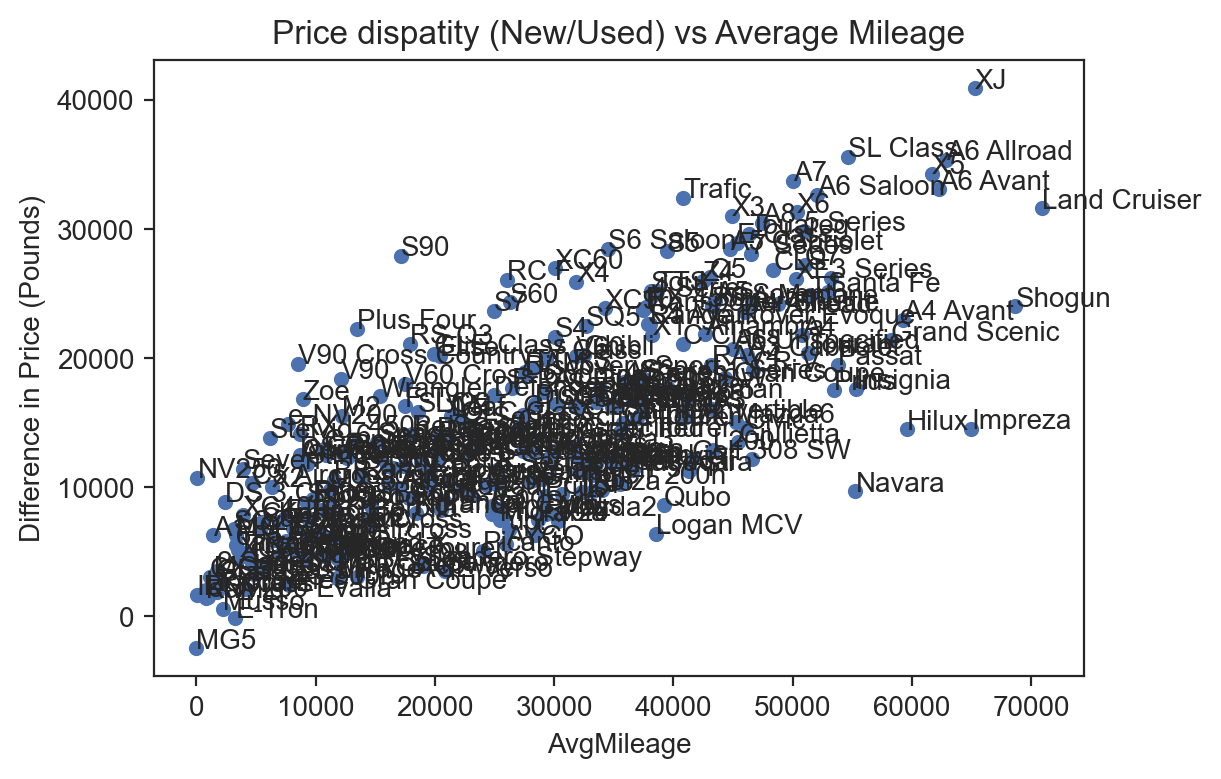

In [152]:
#create scatter plot of x vs. y
ax = Carmodel.plot(kind='scatter', x='AvgMileage', y='Differences')
ax.set_title('Price dispatity (New/Used) vs Average Mileage')
ax.set_xlabel('AvgMileage')
ax.set_ylabel('Difference in Price (Pounds)');
#label each point in scatter plot
for idx, row in Carmodel.iterrows():
    ax.annotate(row['Model'], (row['AvgMileage'], row['Differences']))
    #https://www.statology.org/pandas-scatter-plot-label-points/
#which cars retain the most value
#cannot be done for car manufacturers as may be more used supercars than new budget cars


In [153]:
sds = (adv
 .groupby(['Year of Registration', 'Vehicle condition'])
 .size()
)
sds

Year of Registration  Vehicle condition
1986.0                0                       26
1987.0                0                       29
                      1                        3
1988.0                0                       54
                      1                        3
                                           ...  
2018.0                1                     3846
2019.0                0                    38071
                      1                     4632
2020.0                0                    26937
                      1                     4810
Length: 67, dtype: int64

In [154]:
sds1 = (adv
 .groupby(['Year of Registration'])
 .size()
)
sds1

Year of Registration
1986.0       26
1987.0       32
1988.0       57
1989.0       58
1990.0       60
1991.0       76
1992.0       65
1993.0       51
1994.0       78
1995.0       94
1996.0      110
1997.0      151
1998.0      185
1999.0      193
2000.0      266
2001.0      390
2002.0      620
2003.0      956
2004.0     1472
2005.0     2146
2006.0     3277
2007.0     5187
2008.0     6097
2009.0     8458
2010.0    10745
2011.0    12886
2012.0    15821
2013.0    19930
2014.0    24737
2015.0    30512
2016.0    45993
2017.0    73139
2018.0    41484
2019.0    42703
2020.0    31747
dtype: int64

In [155]:
sds2 = sds / sds1 
sds2.tail(50)

Year of Registration  Vehicle condition
1996.0                0                    0.972727
                      1                    0.027273
1997.0                0                    0.960265
                      1                    0.039735
1998.0                0                    0.962162
                      1                    0.037838
1999.0                0                    0.927461
                      1                    0.072539
2000.0                0                    0.962406
                      1                    0.037594
2001.0                0                    0.938462
                      1                    0.061538
2002.0                0                    0.943548
                      1                    0.056452
2003.0                0                    0.942469
                      1                    0.057531
2004.0                0                    0.932065
                      1                    0.067935
2005.0                0 

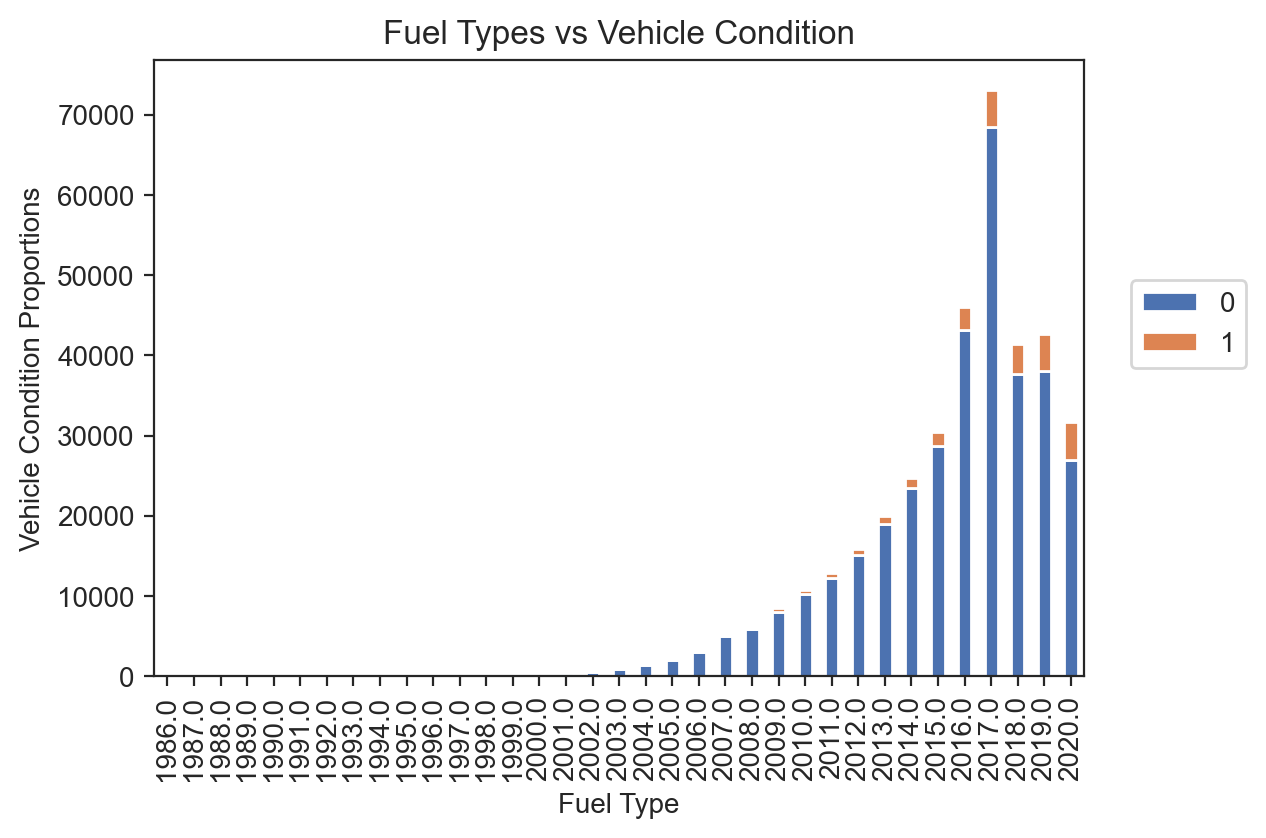

In [156]:
sds.unstack().plot.bar(stacked=True);
plt.title('Fuel Types vs Vehicle Condition')
plt.xlabel("Fuel Type")
plt.ylabel("Vehicle Condition Proportions")
plt.legend(loc=(1.05, 0.5))


In [157]:
adv['Vehicle condition'].value_counts().tail(50)

Vehicle condition
0    351737
1     28065
Name: count, dtype: int64

In [158]:
#categorical categorical
fuels = (adv
 .groupby(['Fueltype', 'Vehicle condition'])
 .size()
)
fuels

Fueltype               Vehicle condition
Bi Fuel                0                        66
                       1                       146
Diesel                 0                    147256
                       1                      4798
Diesel Hybrid          0                       907
                       1                       315
Diesel Plug-in Hybrid  0                       175
                       1                         6
Electric               0                      2936
                       1                      1213
Petrol                 0                    184228
                       1                     18185
Petrol Hybrid          0                     11474
                       1                      1912
Petrol Plug-in Hybrid  0                      4316
                       1                      1357
dtype: int64

In [159]:
fuelsize = (adv
 .groupby(['Fueltype'])
 .size()
)
fuelsize
#they aint making new diesal cars - driving zones clean air

Fueltype
Bi Fuel                     212
Diesel                   152054
Diesel Hybrid              1222
Diesel Plug-in Hybrid       181
Electric                   4149
Petrol                   202413
Petrol Hybrid             13386
Petrol Plug-in Hybrid      5673
dtype: int64

In [160]:
Fuelprop = fuels / fuelsize
Fuelprop

Fueltype               Vehicle condition
Bi Fuel                0                    0.311321
                       1                    0.688679
Diesel                 0                    0.968445
                       1                    0.031555
Diesel Hybrid          0                    0.742226
                       1                    0.257774
Diesel Plug-in Hybrid  0                    0.966851
                       1                    0.033149
Electric               0                    0.707640
                       1                    0.292360
Petrol                 0                    0.910159
                       1                    0.089841
Petrol Hybrid          0                    0.857164
                       1                    0.142836
Petrol Plug-in Hybrid  0                    0.760797
                       1                    0.239203
dtype: float64

In [161]:
adv.sample(5)

,Mileage,Regcode,Colour,Make,Model,Vehicle condition,Year of Registration,Price,Bodytype,Crossover car and van,Fueltype,Milesperyear,Category,AvgModelUsed,AvgModelNew,AvgMakeNew,AvgMakeUsed
public_reference,,,,,,,,,,,,,,,,,
202010024520507,9238.0,18,Red,Peugeot,108,0,2018.0,7495,Hatchback,0,Petrol,4619.000000,Cheap,6755.648160,10894.629213,23855.490476,9863.660748
202008112333354,70000.0,61,Blue,Mercedes-Benz,E Class,0,2011.0,9695,Convertible,0,Diesel,7777.777778,Lower,19259.010753,48218.966667,38410.752920,19259.519050
202008122406091,100000.0,10,Red,BMW,3 Series,0,2010.0,4495,Coupe,0,Diesel,10000.000000,Cheap,14746.646749,40998.667954,41582.747582,17827.095737
202010255413812,110917.0,11,Grey,Volkswagen,Touran,0,2011.0,4989,MPV,0,Diesel,12324.111111,Cheap,12198.599751,32606.307692,25017.642182,13331.667592
202006230430999,10.0,NaN,Silver,Renault,Clio,1,2012.0,15699,Hatchback,0,Petrol,1.250000,Medium,7787.395963,17297.902386,24080.316719,9576.376377


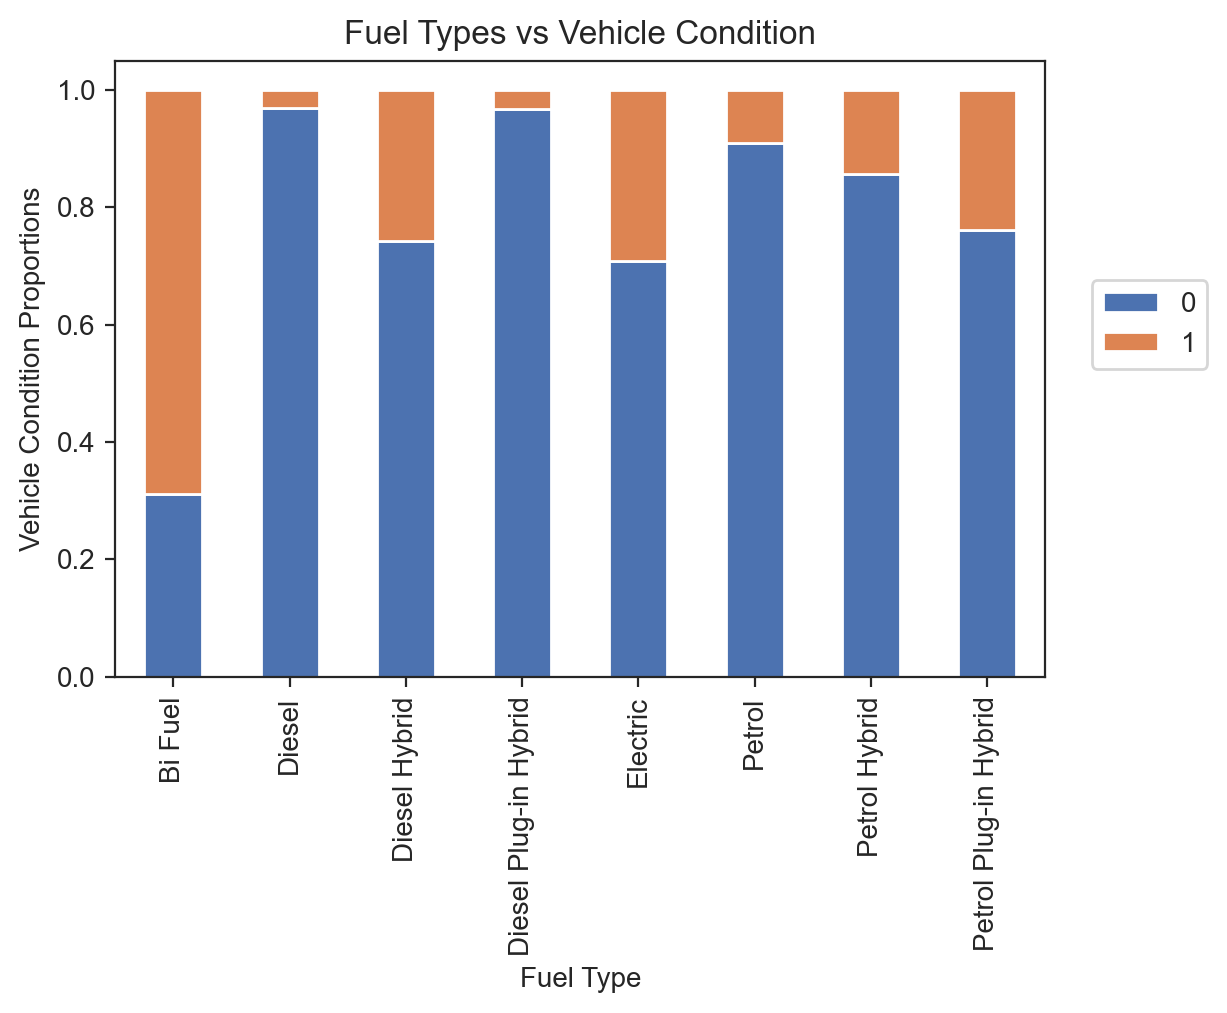

In [162]:
Fuelprop.unstack().plot.bar(stacked=True);
plt.title('Fuel Types vs Vehicle Condition')
plt.xlabel("Fuel Type")
plt.ylabel("Vehicle Condition Proportions")
plt.legend(loc=(1.05, 0.5))
plt.savefig('fsfnsjfnsj.jpeg', dpi=300, bbox_inches = "tight")
#need to order it

#the used car market vs the new car market are effecitvely two differnt places
#traditional fuel types (petrol, diesel) are being replaced by sustainable
#diesel cars are being phased out at a quicker rate than petrol
plt.savefig('fsfnsjfnsj.jpeg', dpi=300, bbox_inches = "tight")

In [163]:
dist_sex_survived2 = (adv
 .groupby(['Category', 'Bodytype'])
 .size()
)
dist_sex_survived2.head(50)

Category  Bodytype       
Cheap     Camper                 4
          Car Derived Van        0
          Chassis Cab            1
          Combi Van             36
          Convertible         4070
          Coupe               4060
          Estate              4977
          Hatchback          60067
          Limousine             25
          MPV                 5172
          Minibus                5
          Panel Van             12
          Pickup                54
          SUV                 9474
          Saloon              5636
          Window Van             8
Lower     Camper                 7
          Car Derived Van        1
          Chassis Cab            1
          Combi Van             32
          Convertible         2374
          Coupe               3136
          Estate              5556
          Hatchback          50768
          Limousine             38
          MPV                 4194
          Minibus               11
          Panel Van          

In [164]:
dist_sex2 = (adv
 .groupby(['Category'])
 .size()
)
dist_sex2
#they aint making new diesal cars - driving zones clean air

Category
Cheap        93694
Lower        95363
Medium       95301
Upper        47726
Expensive    47718
dtype: int64

In [165]:
survived_cond_on_sex2 = dist_sex_survived2 / dist_sex2
survived_cond_on_sex2.head(50)

Category  Bodytype       
Cheap     Camper             0.000043
          Car Derived Van    0.000000
          Chassis Cab        0.000011
          Combi Van          0.000384
          Convertible        0.043439
          Coupe              0.043333
          Estate             0.053120
          Hatchback          0.641098
          Limousine          0.000267
          MPV                0.055201
          Minibus            0.000053
          Panel Van          0.000128
          Pickup             0.000576
          SUV                0.101116
          Saloon             0.060153
          Window Van         0.000085
Lower     Camper             0.000073
          Car Derived Van    0.000010
          Chassis Cab        0.000010
          Combi Van          0.000336
          Convertible        0.024894
          Coupe              0.032885
          Estate             0.058262
          Hatchback          0.532366
          Limousine          0.000398
          MPV           

In [166]:
aa =survived_cond_on_sex2.to_frame()

In [167]:
aa.columns = ["proportions"]
aa

proportions
Category  Bodytype                    
Cheap     Camper              0.000043
          Car Derived Van     0.000000
          Chassis Cab         0.000011
          Combi Van           0.000384
          Convertible         0.043439
...                                ...
Expensive Panel Van           0.000168
          Pickup              0.002138
          SUV                 0.530303
          Saloon              0.133660
          Window Van          0.000084

[80 rows x 1 columns]

In [168]:
aa.head()

proportions
Category Bodytype                    
Cheap    Camper              0.000043
         Car Derived Van     0.000000
         Chassis Cab         0.000011
         Combi Van           0.000384
         Convertible         0.043439

In [169]:
aa['proportions'] = aa[(aa['proportions'] >= 0.01)]

In [170]:
aa3 = aa[aa['proportions'].notna()]

In [171]:
aa3.head(50)

proportions
Category  Bodytype                
Cheap     Convertible     0.043439
          Coupe           0.043333
          Estate          0.053120
          Hatchback       0.641098
          MPV             0.055201
          SUV             0.101116
          Saloon          0.060153
Lower     Convertible     0.024894
          Coupe           0.032885
          Estate          0.058262
          Hatchback       0.532366
          MPV             0.043979
          SUV             0.240890
          Saloon          0.063452
Medium    Convertible     0.033053
          Coupe           0.053462
          Estate          0.068814
          Hatchback       0.352662
          MPV             0.037901
          SUV             0.339167
          Saloon          0.109254
Upper     Convertible     0.036772
          Coupe           0.064284
          Estate          0.067259
          Hatchback       0.231195
          MPV             0.030277
          SUV             0.430164
          Saloon          0.131647
Expensive Convertible     0.055430
          Coupe           0.100214
          Estate          0.069240
          Hatchback       0.092376
          MPV             0.010730
          SUV             0.530303
          Saloon          0.133660

In [172]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#e6daa6']

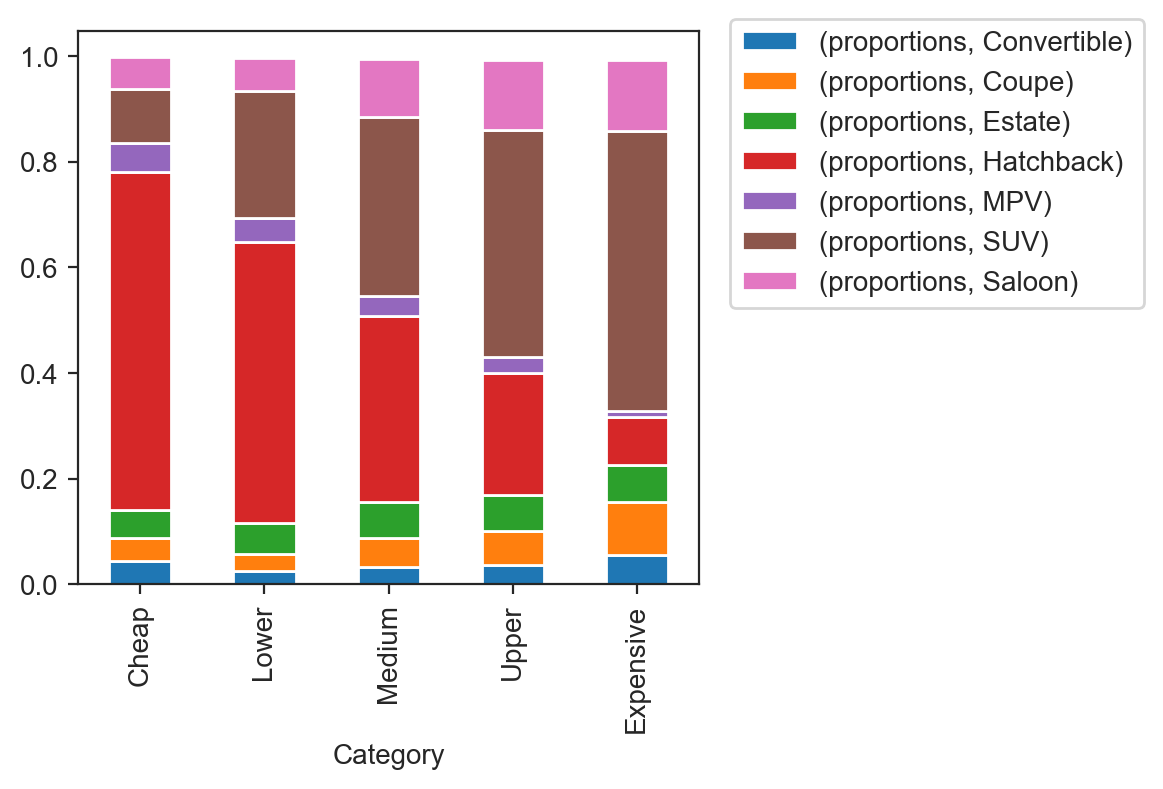

In [173]:
ax = aa3.unstack().plot.bar(stacked=True, color=colors)
plt.legend(loc= (1.05, 0.5)) 
plt.show
plt.tight_layout()
plt.savefig("prop.jpeg")

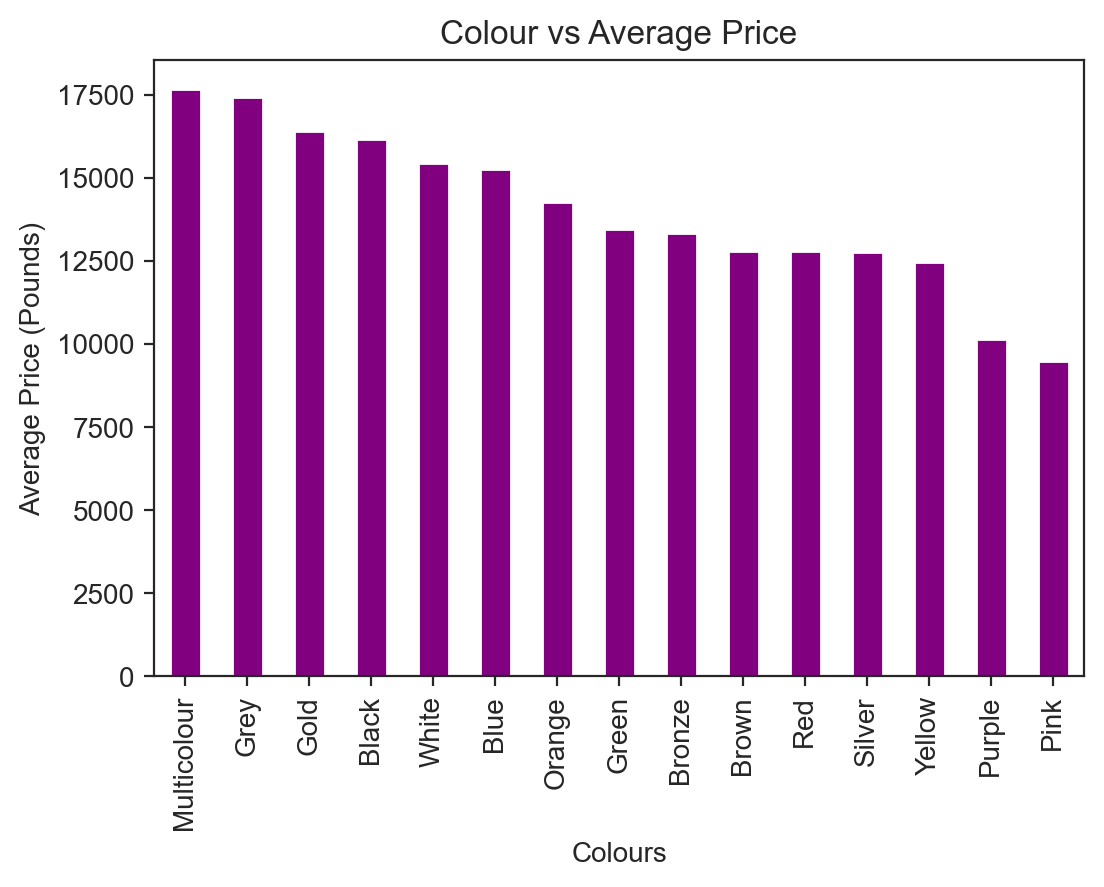

In [174]:
df = pd.DataFrame(adv.groupby(['Colour'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(color='purple', legend=False,)
plt.title('Colour vs Average Price')
plt.xlabel("Colours")
plt.ylabel("Average Price (Pounds)");
plt.savefig('sfdss.jpeg', dpi=300, bbox_inches = "tight")
plt.show()